**学完这小节后，你将能搞定大部分数据探索的绘图任务，本节的重点在于熟悉matplotlib&seaborn，并感受参数设置的规律，做到用时一搜就能快速画出来，不用去记住所有参数，使用help()或者Shift+Tab可以查看参数设置说明。**

### 1.导入matplotlib&seaborn包

In [1]:
# %matplotlib inline的用途:直接在笔记本中渲染图形，可以省略掉plt.show()这一步。
# 在Retina显示屏等高分辨率屏幕上，jupyter notebook电脑中的默认图像看起来很模糊。
# 在%matplotlib inline后使用%config InlineBackend.figure_format = 'retina'来渲染更高分辨率的图像。
%matplotlib inline    
%config InlineBackend.figure_format = 'retina' 

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import numpy as np 
import pandas as pd 

Seaborn其实是在matplotlib的基础上进行了更高级的API封装，从而使得作图更加容易，在大多数情况下使用seaborn就能做出很具有吸引力的图，而使用matplotlib就能制作具有更多特色的图。**应该把Seaborn视为matplotlib的补充，而不是替代物**。

备注：在notebook中使用plt绘图共有三种模式

- %matplotlib inline：这是默认的模式，输出的图片是静态的，前面提过
- %matplotlib auto：在这个模式下会弹出一个单独 的绘图窗口，和在pycharm中一样
- %matplotlib notebook：在这个模式下会在notebook中产生一个绘图窗口，能够对图片进行放大缩小等操作

但最好不要混用，jupyter也不是万无一失零bug的…

### 2.matplotlib（pyplot）

#### 2.1 一般概念（了解就好）

Matplotlib 是 Python 的绘图库。 它可与 NumPy 一起使用，提供了一种有效的 MatLab 开源替代方案。 它也可以和图形工具包一起使用，如 PyQt 和 wxPython。

**matplotlib中的所有内容都按层次结构进行组织**。 `在层次结构的顶部是matplotlib“状态机环境”，它由matplotlib.pyplot模块提供`。 

层次结构中的下一级是面向对象的接口的第一级，`其中pyplot仅用于少数函数，例如图形创建，并且用户显式创建并跟踪图形和轴对象`。 在此级别，用户使用pyplot来创建图形，并且通过这些图形，可以创建一个或多个轴对象。

#### 2.2 图形部分

看下每个词的作用位置：

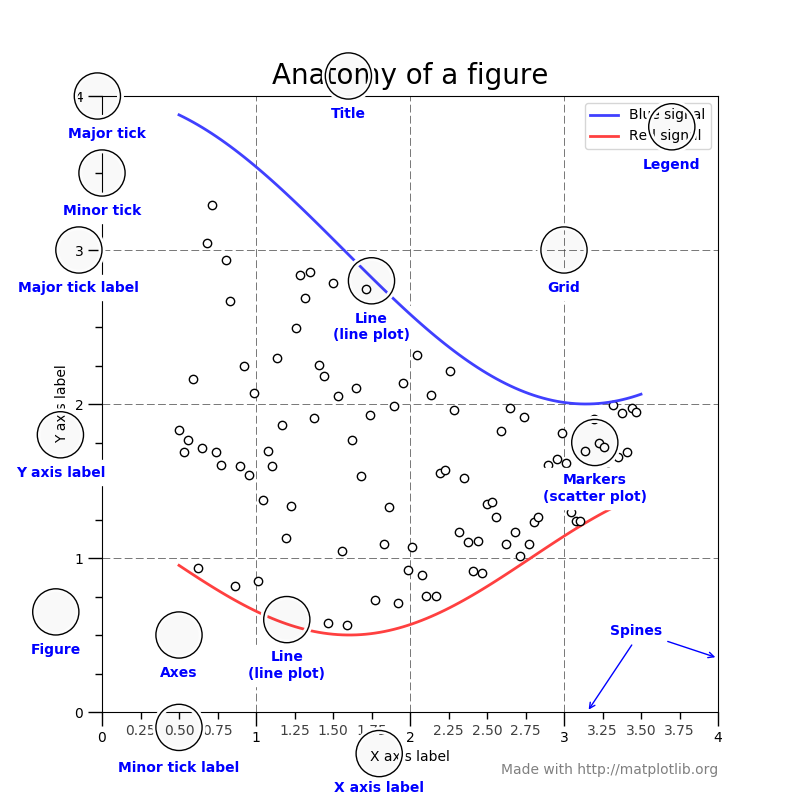

#### 2.2 图形中文不显示的问题

Matplotlib 默认情况不支持中文，我们可以使用以下简单的方法来解决：

首先看下win系统C:\Windows\Fonts中是否有字体SimHei.ttf，没有就[下载（注意系统）](https://www.fontpalace.com/font-details/SimHei/)

[MacOS对应操作](https://cloud.tencent.com/developer/article/1669738)

然后运行下面cell查询matplotlib配置文件路径：

In [2]:
import matplotlib
print(matplotlib.matplotlib_fname())

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


用记事本打开matplotlibrc，找到 #font.family:和#font.sans-serif: 开头的这两行，然后改为SimHei，如图：
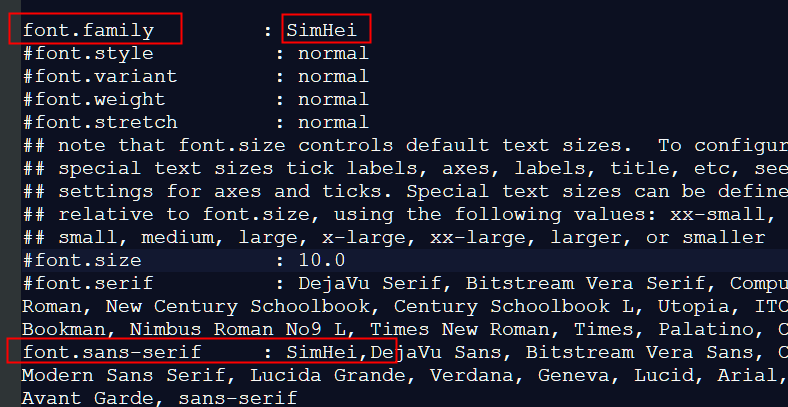

然后保存文件，重新运行python环境即可，不必在代码中做出任何修改。

另有一种写参数处理的办法（但每次都需要写参数，如果需要切换执行环境，可以考虑写）：
```
mpl.rcParams['font.sans-serif'] = ['SimHei']    # 指定默认字体：解决plot不能显示中文问题
mpl.rcParams['axes.unicode_minus'] = False           # 解决保存图像是负号'-'显示为方块的问题
```

如果遇到负号显示为方框，就和上面一样修改配置文件，取掉#axes.unicode_minus :开头那一行的注释，将值修改为false

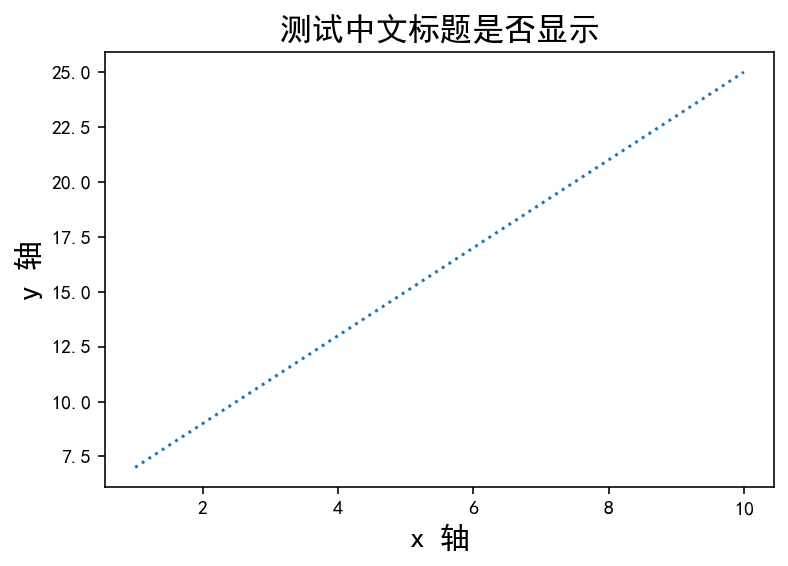

In [3]:
x = np.arange(1,11) 
y =  2  * x +  5 
plt.title("测试中文标题是否显示",fontsize=16) 

plt.xlabel("x 轴",fontsize=15)
plt.ylabel("y 轴",fontsize=15)
plt.plot(x,y,":") # ":"用来设置线的格式
plt.show()

#### 2.3 格式字符串（用于显示离散值）

作为线性图的替代，可以通过向 plot() 函数添加格式字符串来显示离散值。 可以使用以下格式化字符。

字符|	描述
--|--
'-'	|实线样式
'--'|	短横线样式
'-.'|	点划线样式
':'	|虚线样式
'.'	|点标记
','	|像素标记
'o'	|圆标记
'v'	|倒三角标记
'^'	|正三角标记
'&lt;'|	左三角标记
'&gt;'|	右三角标记
'1'	|下箭头标记
'2'	|上箭头标记
'3'	|左箭头标记
'4'	|右箭头标记
's'	|正方形标记
'p'	||五边形标记
'*'	|星形标记
'h'	|六边形标记 1
'H'	|六边形标记 2
'+'	|加号标记
'x'	|X 标记
'D'	|菱形标记
'd'	|窄菱形标记
'&#124;'|	竖直线标记
'_'	|水平线标记

以下是颜色的缩写：

字符|	颜色
--|--
'b'	|蓝色
'g'	|绿色
'r'	|红色
'c'	|青色
'm'	|品红色
'y'	|黄色
'k'	|黑色
'w'	|白色




例，显示圆点：

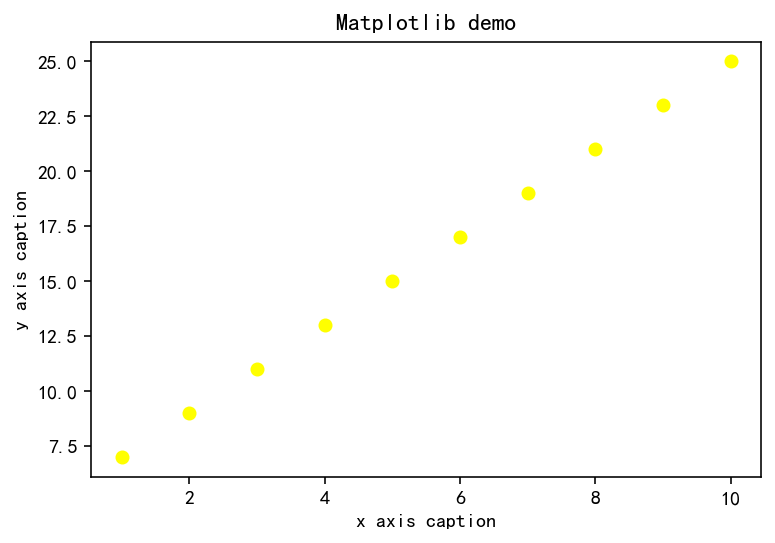

In [4]:
x = np.arange(1,11) 
y =  2  * x +  5 
plt.title("Matplotlib demo") 
plt.xlabel("x axis caption") 
plt.ylabel("y axis caption") 
plt.plot(x,y,"ob", color= 'yellow')
plt.show()

#### 2.4 显示标记值

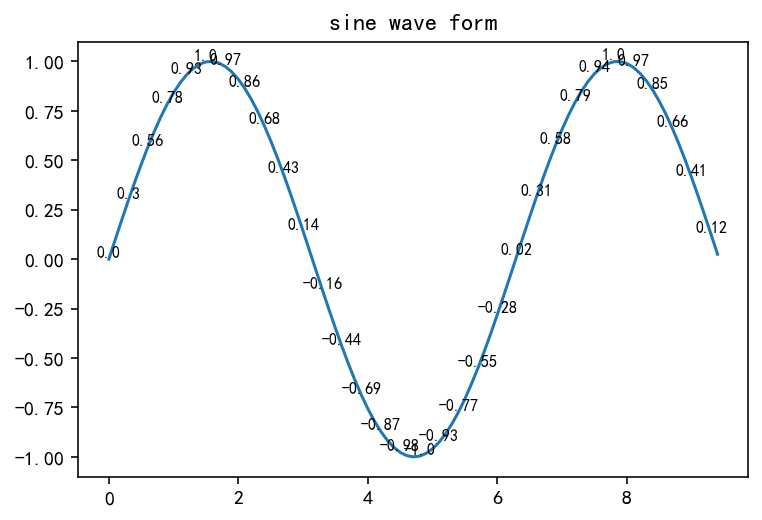

In [5]:
#绘制正弦波
x = np.arange(0,  3  * np.pi,  0.1) 
y = np.sin(x)
plt.title("sine wave form")  
# 使用 plt.text 来标记值
plt.plot(x, y)  
for a, b in np.array([(a,b) for a,b in zip(x,y)])[::3]: # 3行取1个
    plt.text(a, b, round(b,2), ha='center', va='bottom', fontsize=8) 

    # 位置参数plt.text(x, y, s)，xy对应位置，s对应值
    # ha有三个选择：right,center,left
    # va有四个选择：'top', 'bottom', 'center', 'baseline', 和 ha参数都用于控制注释的位置。

# plt.show()

#### 2.5 subplot() 与 add_subplot()

subplot() 函数允许你在同一图中绘制不同的东西。

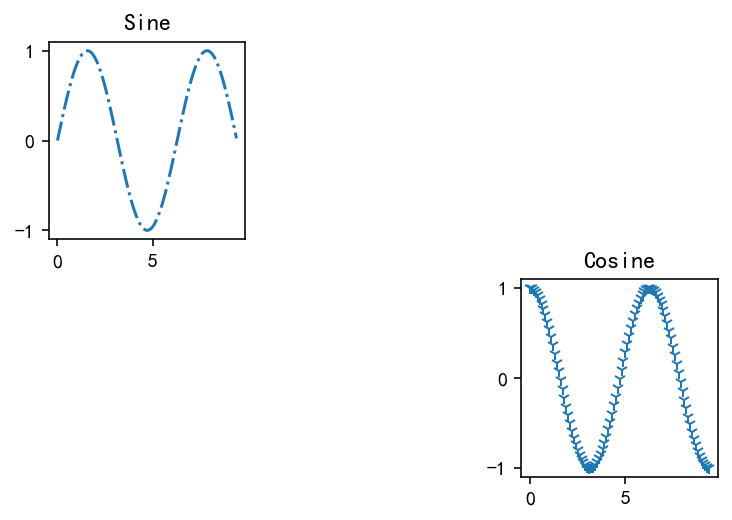

 不用 plt.subplot() 时，默认都绘制在"整个网格"上： 


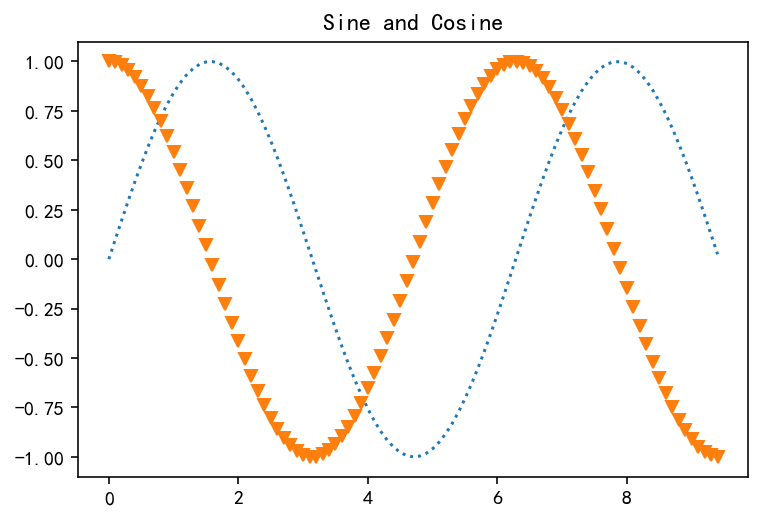

In [6]:
# 计算正弦和余弦曲线上的点的 x 和 y 坐标 
x = np.arange(0,  3  * np.pi,  0.1) 
y_sin = np.sin(x) 
y_cos = np.cos(x)  

plt.subplot(2,  3,  1)  # 建立 subplot 网格，高为 2，宽为 3 ， 激活第1个 subplot
# 绘制第1格图像 
plt.plot(x, y_sin,'-.') 
plt.title('Sine')  

plt.subplot(2,  3,  6) # 将第6格 subplot 激活，并绘制图像，相应的，你肯定猜到了第2、…、5格位置了吧，敲出来试试
plt.plot(x, y_cos,'1') 
plt.title('Cosine')  
# 展示图像
plt.show()

print(' 不用 plt.subplot() 时，默认都绘制在"整个网格"上： ')

plt.plot(x, y_sin,":") 
plt.plot(x, y_cos,'v') 
plt.title('Sine and Cosine') 
plt.show()

**add_subplot():**
参数和含义与pyplot的方式中plt.subplot()是相同的，不过add_subplot()面向对象使用。

注：subplot(224)中参数224等价subplot(2,2,4),前者简写适用于参数0~9,两种写法是通用的，不过通常都是带逗号的写。

* 使用面向对象的方式
```
x = np.arange(1, 100)
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.plot(x, x)
ax2 = fig.add_subplot(222)
ax2.plot(x, -x)
ax3 = fig.add_subplot(223)
ax3.plot(x, x ** 2)
ax4 = fig.add_subplot(224)
ax4.plot(x, np.log(x))
plt.show()
```

* pyplot的方式
```
x = np.arange(0, 100)
plt.subplot(221)
plt.plot(x, x)
plt.subplot(222)
plt.plot(x, -x)
plt.subplot(223)
plt.plot(x, x ** 2)
plt.subplot(224)
plt.plot(x, np.log(x))
```



#### 2.6 bar() 条形图

Text(0.5, 0, 'X axis')

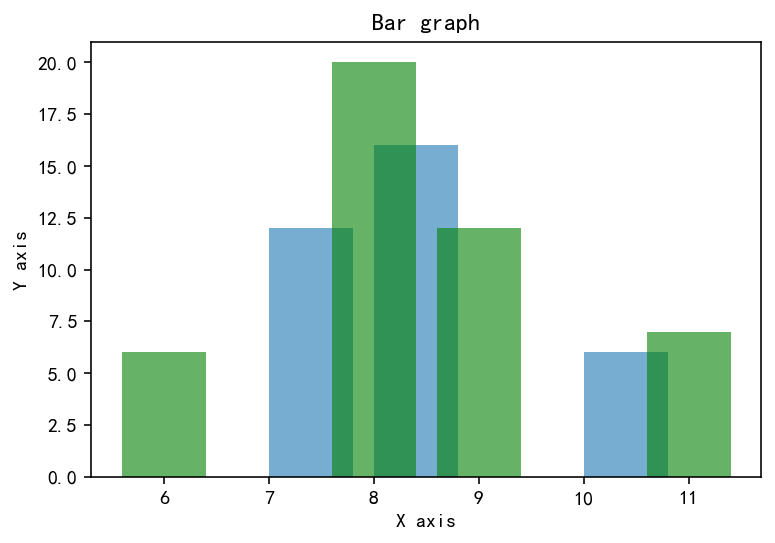

In [7]:
x =  [7,8,10] 
y =  [12,16,6] 
x2 =  [6,8,9,11] 
y2 =  [6,20,12,7] 
plt.bar(x, y, align =  'edge',alpha=0.6)
plt.bar(x2, y2, color =  'g', align =  'center',alpha=0.6) #后画的图“覆盖”先画的图,alpha设置透明度
plt.title('Bar graph') 
plt.ylabel('Y axis') 
plt.xlabel('X axis') 

#### 2.7 频数直方图

先来了解下**numpy.histogram()**，该函数是数据的频率分布的图形表示。

水平尺寸相等的矩形对应于类间隔，称为 bin，变量 hist 对应于频率。numpy.histogram()函数将输入数组和 bin 作为两个参数， bin 数组中的连续元素用作每个 bin 的边界。

示例：

In [8]:
a = np.array([22,87,5,43,56,73,23,55,54,11,20,51,5,79,31,27])
hist,bins = np.histogram(a,bins =  [0,20,40,60,80,100])  
print ('hist:',hist) 
print ('bins:',bins)
np.histogram(a,bins =  [0,20,40,60,80,100])  # 输出两个数组，一个频数，一个边界

hist: [3 5 5 2 1]
bins: [  0  20  40  60  80 100]


(array([3, 5, 5, 2, 1], dtype=int64), array([  0,  20,  40,  60,  80, 100]))

**Matplotlib.pyplot.hist()**

Matplotlib 可以将直方图的数字表示转换为图形， pyplot 子模块的 plt() 函数将包含数据和 bin 数组的数组作为参数，并转换为直方图。

例：

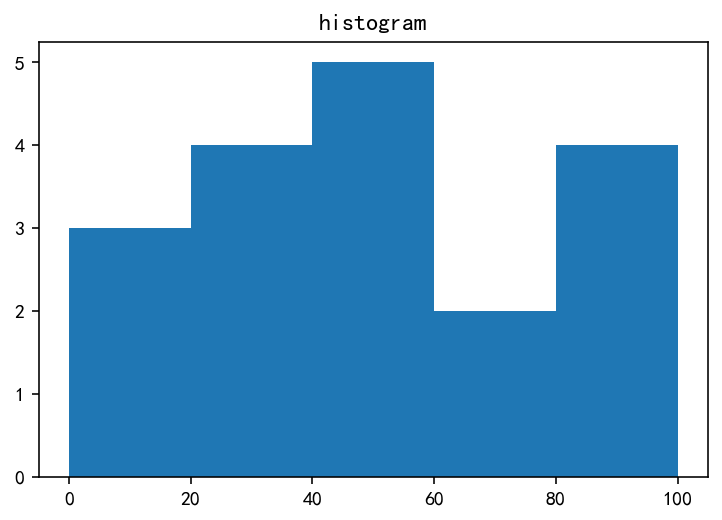

In [9]:
a = np.array([22,87,5,43,56,73,55,54,11,20,51,5,79,31,27,88,99,97]) 
plt.hist(a, bins =  [0,20,40,60,80,100]) 
plt.title("histogram") 
plt.show() 

#### 2.8 其他（matplotlib）

###### 设置**图例**位置

`plt.legend(loc='best',bbox_to_anchor=(0.1,0.2)) `

String|Number
--|--
upper right|1
upper left|	2
lower left	|3
lower right	|4
right	|5
center left	|6
center right	|7
lower center	|8
upper center	|9
center	|10

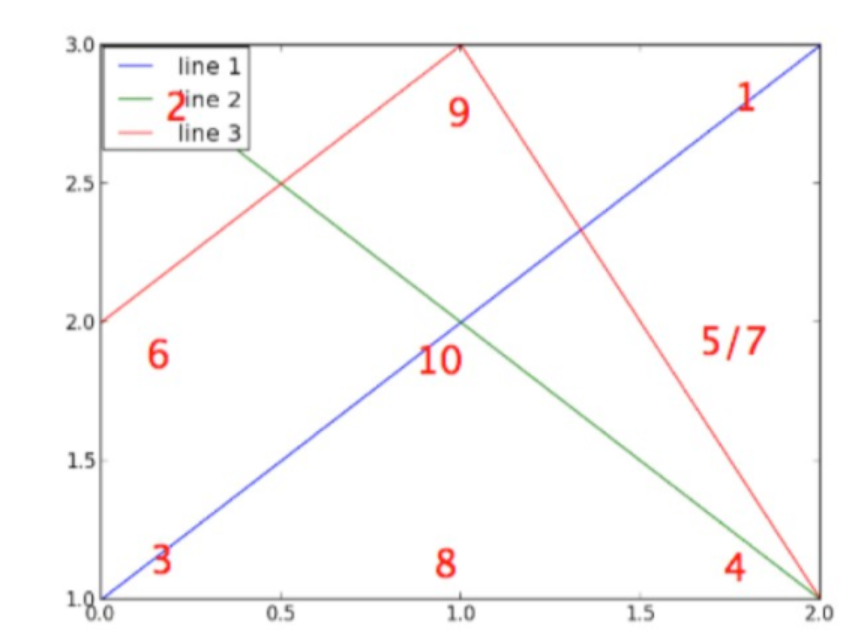

所以loc这个参数可以设置大概的图例位置，如果这就可以满足要求，那么第二个参数不要也行。

第二个参数bbox_to_anchor被赋予的二元组中，num1用于控制legend的左右移动，值越大越向右边移动，num2用于控制legend的上下移动，值越大，越向上移动。用于微调图例的位置。 **记住plt.legend(loc='best')就够了**。

### 3.绘图的几个概念

#### 3.1 分组绘图VS分面绘图

* 分组绘图

比如说需要在一张图上绘制两条曲线，分别是南方和北方的气温变化，分别用不同的颜色加以区分。在seaborn中用hue参数控制分组绘图。
* 分面绘图

其实就是在一张纸上划分不同的区域，比如2*2的子区域，在不同的子区域上绘制不同的图形，在matplotlib中就是 add_subplot(2,2,1)，在seaborn中用col参数控制，col的全称是columns，不是color，如果辅助col_wrap参数会更好些。col可以控制columns的子图，row可以控制rows的子图排列。 
如果需要分面绘图，可使用seaborn的FacetGrid对象，seaborn的一般的绘图函数是没有分面这个参数的。

* 统计函数

分组绘图的时候，会对分组变量先要用统计函数，然后绘图，比如先计算变量的均值，然后绘制该均值的直方图。统计绘图参数是 estimator，很多情况下默认是numpy.mean。在R语言ggplot2中就大量使用了这种方法。如果不用统计绘图，就需要先用pandas进行groupby分组汇总，然后用seaborn绘图，多此一举了。

### 4. Seaborn

在seaborn中图形大概分这么几类，因子变量绘图，数值变量绘图，两变量关系绘图，时间序列图，热力图等。

In [10]:
import seaborn as sns

#### 4.1 主题与配色

seaborn支持5种主题：

    1.darkgrid（灰色网格）
    2.whitegrid（白色网格）
    3.dark（黑色）
    4.white（白色）
    5.ticks（十字叉）

In [11]:
# 设置主题
sns.set_style("darkgrid")

[调色板参考链接](https://blog.csdn.net/qq_30638831/article/details/79841177)

颜色主题有6种不同的风格: deep, muted, pastel, bright, dark和colorblind。

当你有6种以上颜色需要区分的时候,最为常见的方式是采用hls颜色空间，这是一个RGB值的简单转换:

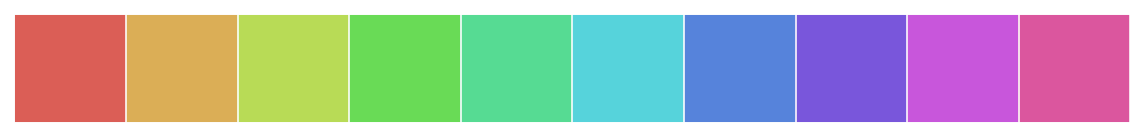

In [12]:
sns.palplot(sns.color_palette("hls", 10))#palplot是创建调色板 : color_palette（颜色空间，设置几种颜色块）
# sns.color_palette("hls", 10)

* color_palette()能传入任何Matplotlib所支持的颜色
* color_palette()不写参数则默认颜色

* set_palette()设置所有图的颜色

（绘图时使用参数palette设置颜色）

#### 4.2 常见图形

##### 4.2.1 boxplot箱线图

In [13]:
tips = sns.load_dataset("tips") #导入sns内置数据集
tips.describe(include='all')
tips.head(8)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4


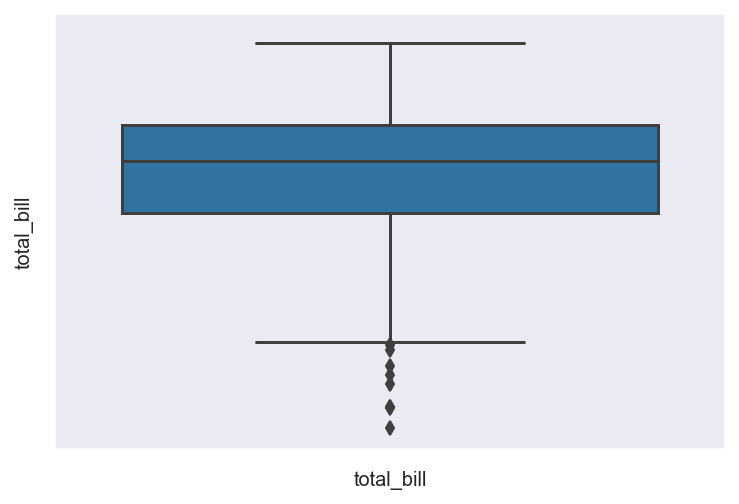

In [14]:
# 绘制箱线图
ax = sns.boxplot(x=tips["total_bill"])
# 竖着放的箱线图，也就是将x换成y
ax = sns.boxplot(y=tips["total_bill"])

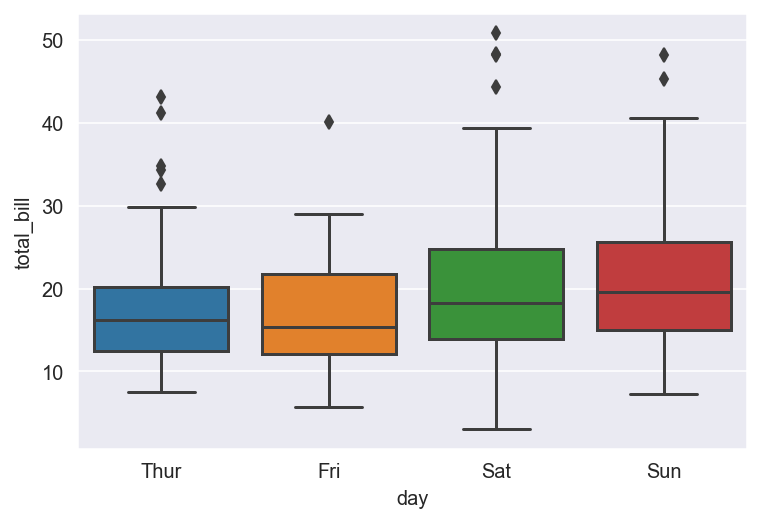

In [15]:
# 分组绘制箱线图，分组因子是day，在x轴不同位置绘制（data为DataFrame格式，x、y对应赋值“字段”）
ax = sns.boxplot(x="day", y="total_bill", data=tips)

In [16]:
tips.tail(5)

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


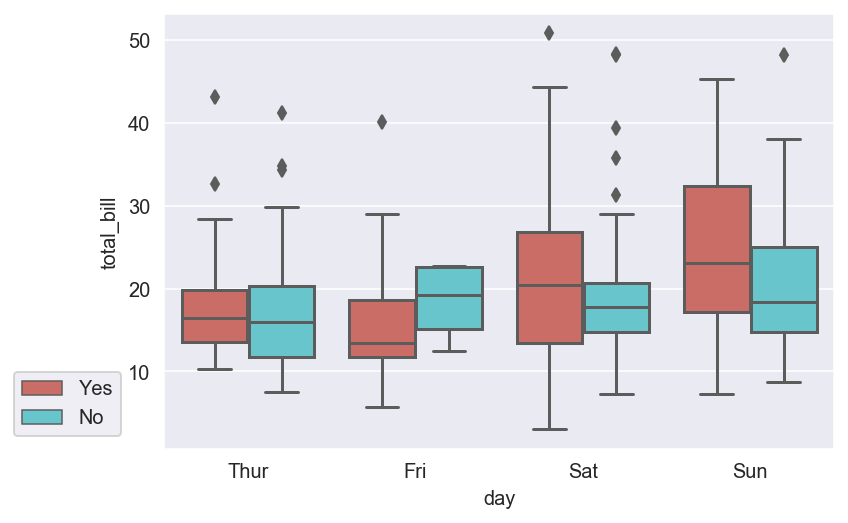

In [17]:
# 分组箱线图，分组因子是smoker，不同的因子用不同颜色区分
# 相当于分组之后又分组
ax = sns.boxplot(x="day", y="total_bill", hue="smoker",
                    data=tips,palette=sns.color_palette("hls", 2)) 
plt.legend(loc='best',bbox_to_anchor=(-0.05,0.2)) # 设置图例位置
plt.show()

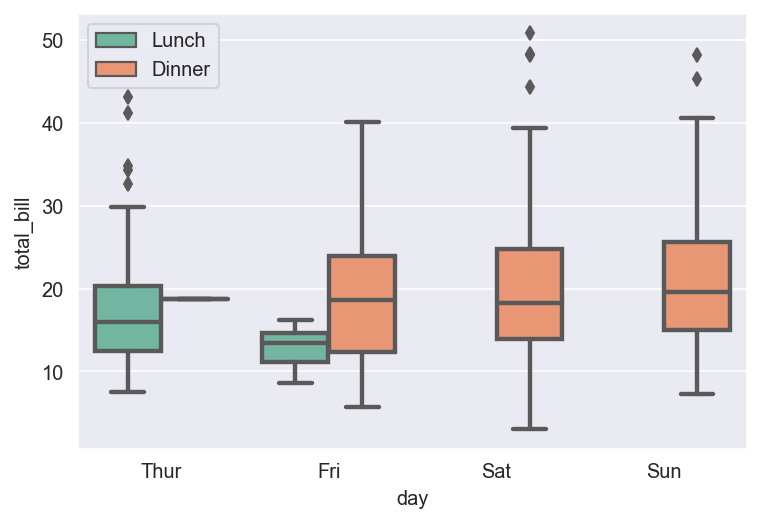

In [18]:
# 改变线宽，linewidth参数
ax = sns.boxplot(x="day", y="total_bill", hue="time",
                    data=tips,linewidth=2.2, palette='Set2')
plt.legend(loc='best')
plt.show()

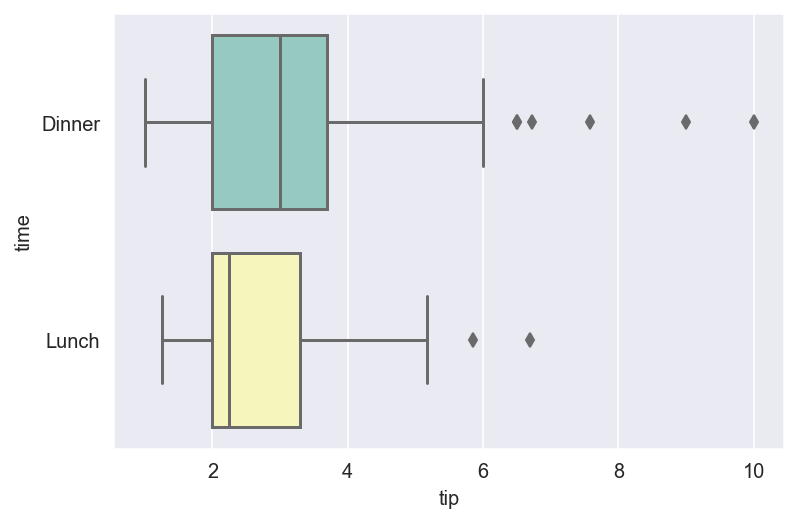

In [19]:
# 改变x轴标签的顺序，order参数;x、y参数换个位置就横过来了
ax = sns.boxplot(y="time", x="tip", data=tips,
                    order=["Dinner", "Lunch"],palette='Set3')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


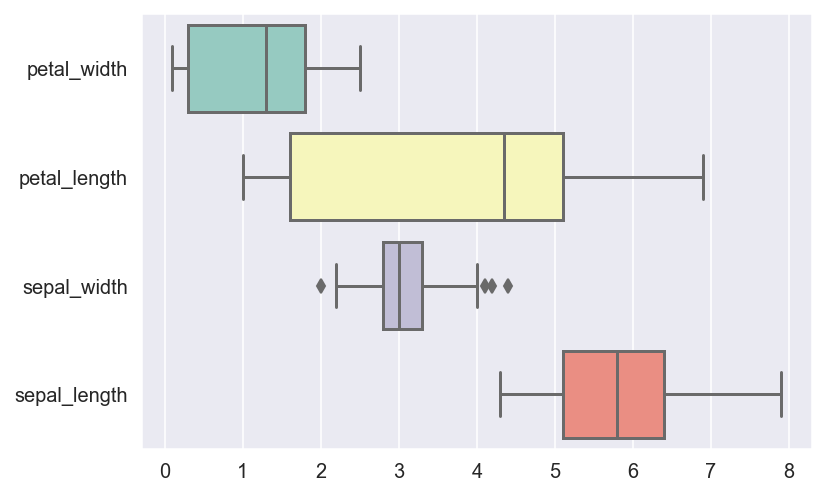

In [20]:
# 对dataframe的每个变量都绘制一个箱线图，水平放置 orient='h'为水平的、默认为垂直的
iris = sns.load_dataset("iris")
ax = sns.boxplot(data=iris.iloc[:,[3,2,1,0]],orient="h", palette="Set3")  
# 注：每个数值型“字段”都自动分组，字符类型自动过滤,支持索引排序，但类似iris.iloc[:,[3,3,2,2]]的索引会出图错误。
iris.head(5)

###### 带分布密度的散点图+箱线图

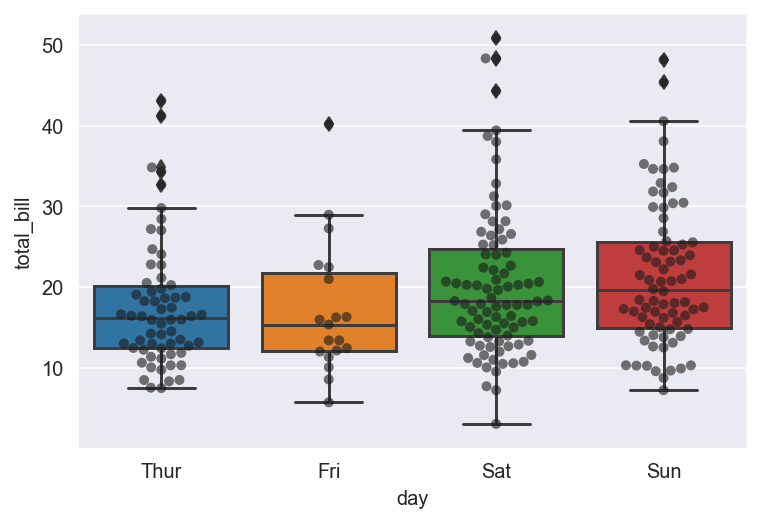

In [21]:
# 箱线图+有分布趋势的散点图
# 图形组合也就是两条绘图语句一起运行就可以了，相当于图形覆盖了
ax = sns.boxplot(x="day", y="total_bill", data=tips)
ax = sns.swarmplot(x="day", y="total_bill", data=tips, color="0.1",alpha=0.6)

##### 4.2.2 violinplot小提琴图

小提琴图其实是箱线图与核密度图的结合，箱线图展示了分位数的位置，小提琴图则展示了任意位置的密度，通过小提琴图可以知道哪些位置的密度较高。在图中，白点是中位数，黑色盒型的范围是下四分位点到上四分位点，细黑线表示须。外部形状即为核密度估计（在概率论中用来估计未知的密度函数，属于非参数检验方法之一）。

0    16.99
1    10.34
2    21.01
3    23.68
4    24.59
Name: total_bill, dtype: float64

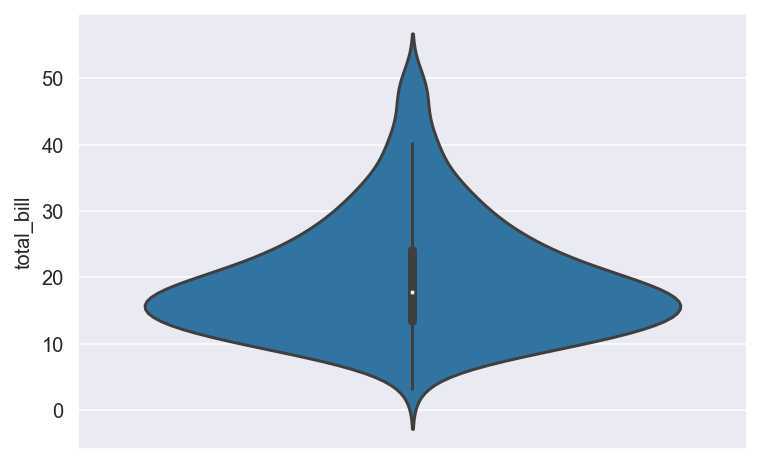

In [22]:
# 绘制小提琴图（x轴指定数据）
ax = sns.violinplot(x=tips["total_bill"],orient='v')#注：未指定y轴时，x轴默认横向，用orient='v'改为垂直
tips["total_bill"].head(5)

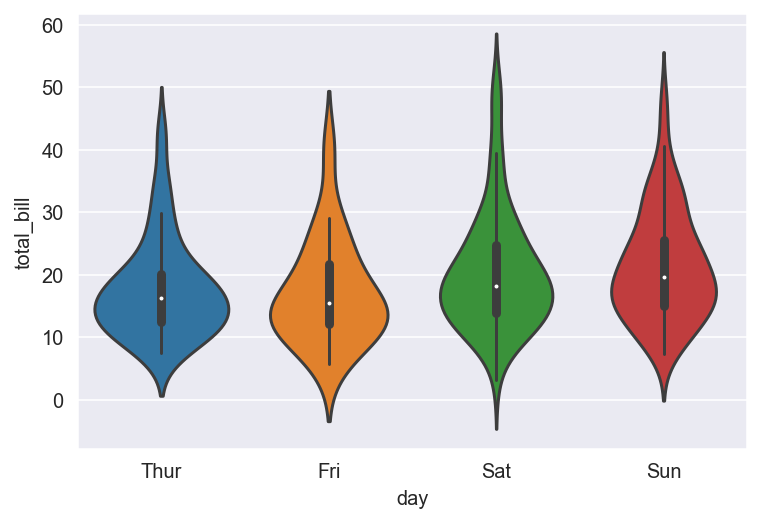

In [23]:
# 分组的小提琴图，同上面的箱线图一样通过X轴分组
ax = sns.violinplot(x="day", y="total_bill", data=tips)

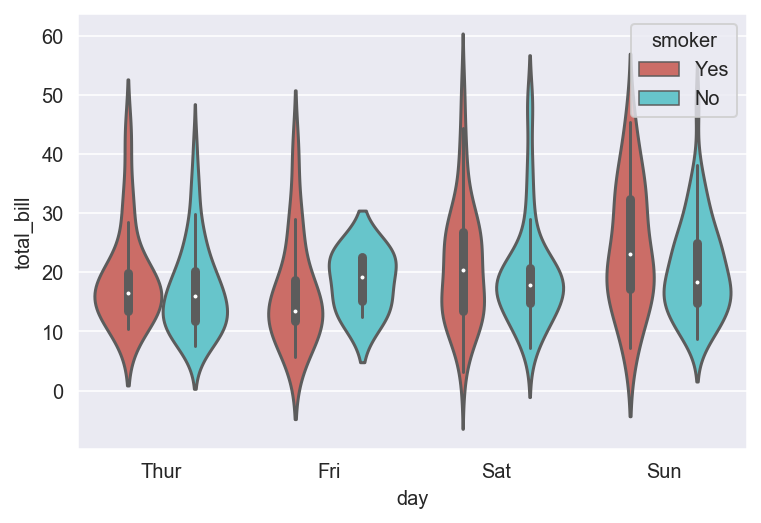

In [24]:
# 通过hue分组的小提琴图，相当于分组之后又分组
ax = sns.violinplot(x="day", y="total_bill", hue="smoker",
                        data=tips, palette=sns.color_palette("hls", 2))

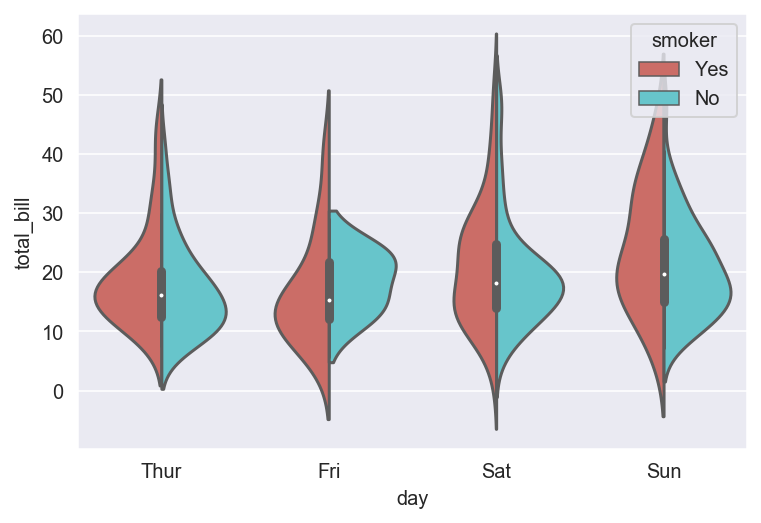

In [25]:
# 分组组合的小提琴图，其实就是hue分组后，各取一半组成一个小提琴图 :split=True
ax = sns.violinplot(x="day", y="total_bill", hue="smoker",
                        data=tips, palette=sns.color_palette("hls", 2),
                            split=True)
# ax=sns.swarmplot(x='day',y='total_bill',data=tips,hue='smoker',alpha=0.5) # 当然，可以叠加散点图

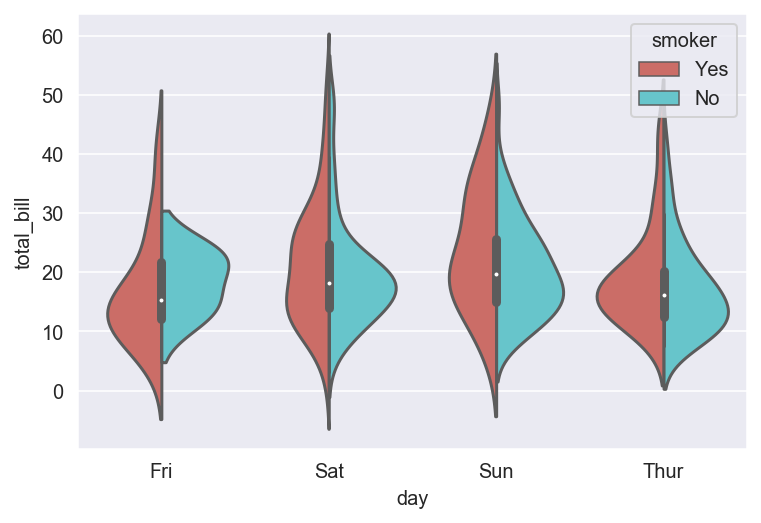

In [26]:
# 调整x轴顺序，同样通过order参数
ax = sns.violinplot(x="day", y="total_bill", hue="smoker",
                        data=tips, palette=sns.color_palette("hls", 2),split=True,
                                order=['Fri','Sat','Sun','Thur'])

##### 4.2.3 散点图（stripplot、swarmplot 两种）

需要注意的是，seaborn中有两个散点图，一个是普通的散点图，另一个是可以看出分布密度的散点图。下面把它们画在一起就明白了。

In [27]:
tips["total_bill"].head(10)

0    16.99
1    10.34
2    21.01
3    23.68
4    24.59
5    25.29
6     8.77
7    26.88
8    15.04
9    14.78
Name: total_bill, dtype: float64

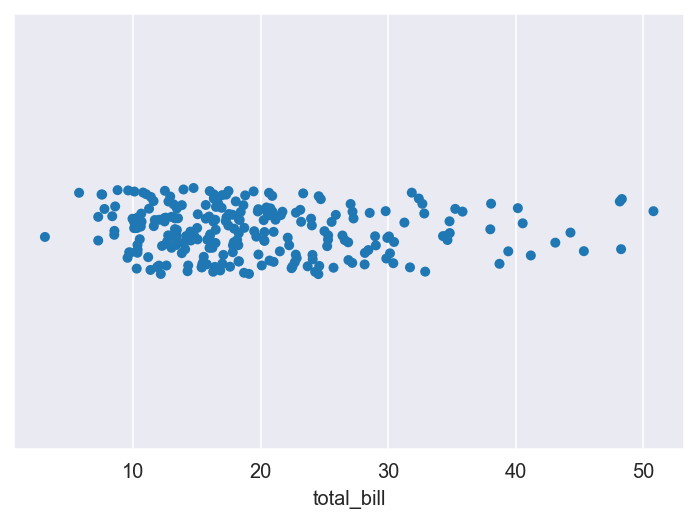

In [28]:
# 普通的散点图
ax1 = sns.stripplot(x=tips["total_bill"])

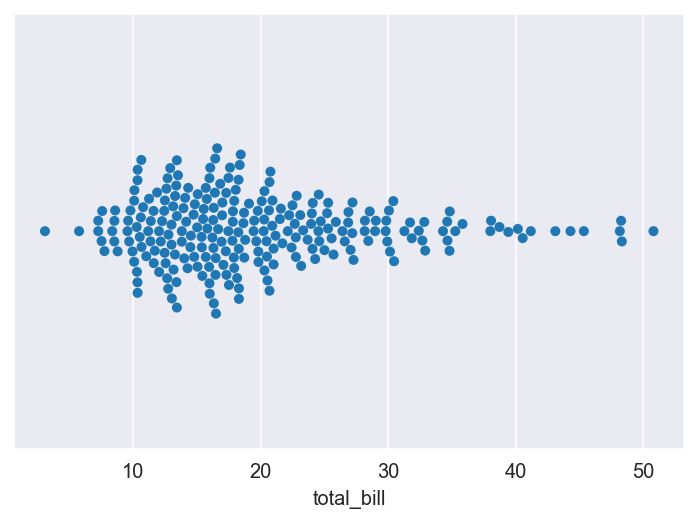

In [29]:
# 带分布密度的散点图
ax2 = sns.swarmplot(x=tips["total_bill"])

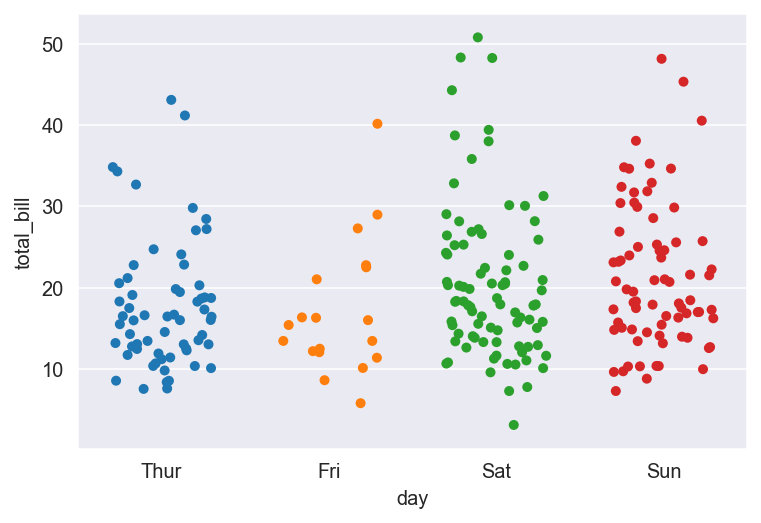

In [30]:
# 分组的散点图 #添加抖动,jitter可以是0.1,0.2...这样的小数，表示抖动的程度大小
ax = sns.stripplot(x="day", y="total_bill", data=tips,jitter=0.3)

# 是不是想横着放呢，很简单的，x-y顺序换一下就好了

In [31]:
# 重点来了，分组绘制，而且是分组后分开绘制，在柱状图中，跟分组柱状图类似的。
# 通过 hue, split 参数控制

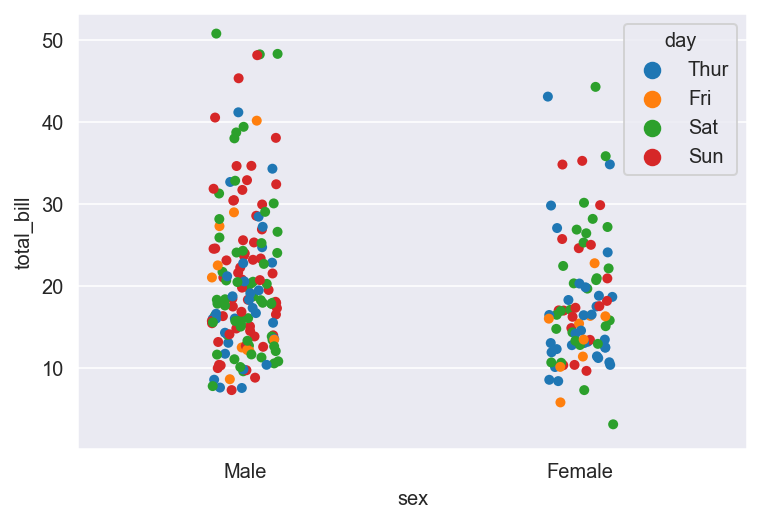

In [32]:
# 1.分组
ax = sns.stripplot(x="sex", y="total_bill", hue="day",
                    data=tips, jitter=True)

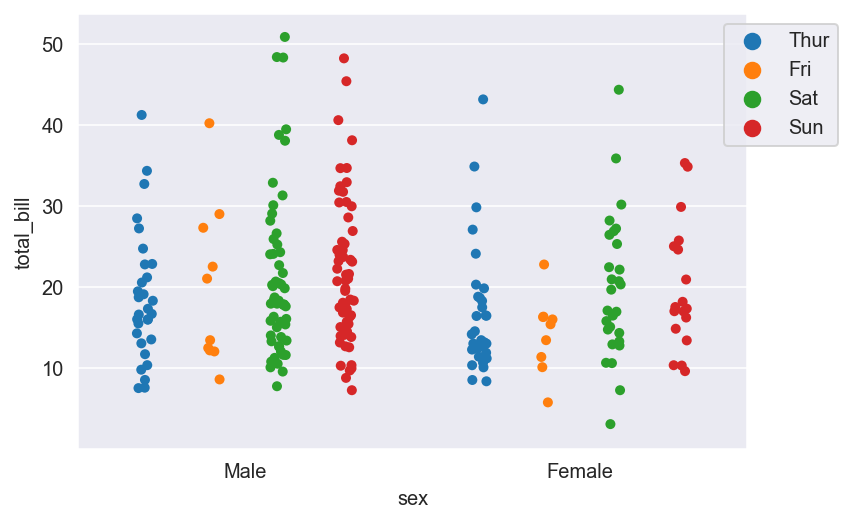

In [33]:
# 2.分开绘制
ax = sns.stripplot(x="sex", y="total_bill", hue="day",
                    data=tips, jitter=True,dodge=True) #dodge是`split`被重命名了。
plt.legend(loc='best',bbox_to_anchor=(1.15,1.00))

In [34]:
# help(sns.stripplot().legend)

swarmplt的参数和用法和stripplot的用法是一样的，只是表现形式不一样而已。

##### 4.2.4 pointplot （显示点估计和置信区间）

基于 help(sns.pointplot)

点图代表散点图位置的数值变量的中心趋势估计，并使用**误差线**提供关于该估计的不确定性的一些指示。点图可能**比条形图更有用于聚焦一个或多个分类变量的不同级别之间的比较**。他们尤其善于表现交互作用：**一个分类变量的层次之间的关系如何在第二个分类变量的层次之间变化**。连接来自**相同色调等级**的每个点的线允许交互作用**通过斜率的差异**进行判断，这比对几组点或条的高度比较容易。具体用法如下：

>seaborn.pointplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=(function mean), ci=95, n_boot=1000, units=None, markers='o', linestyles='-', dodge=False, join=True, scale=1, orient=None, color=None, palette=None, errwidth=None, capsize=None, ax=None, **kwargs)

**误差棒**是以被测量的算术平均值为中点，在表示测量值大小的方向上画出的一个线段，线段长度的一半等于（标准或扩展）不确定度。它表示被测量以某一概率（68%或95%）落在棒上。

* 参数 ci=95为置信区间95%
* 参数 estimator=np.mean(指定点的统计函数)

In [35]:
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


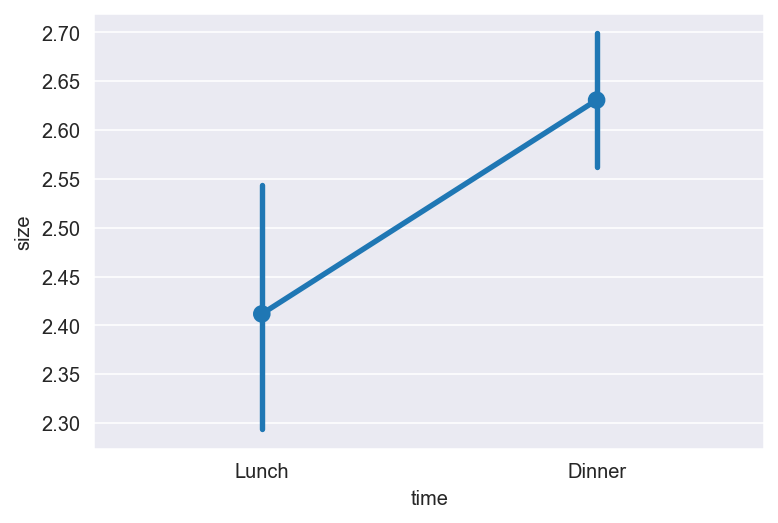

In [36]:
sns.pointplot(x="time",y="size",data=tips,ci=68)

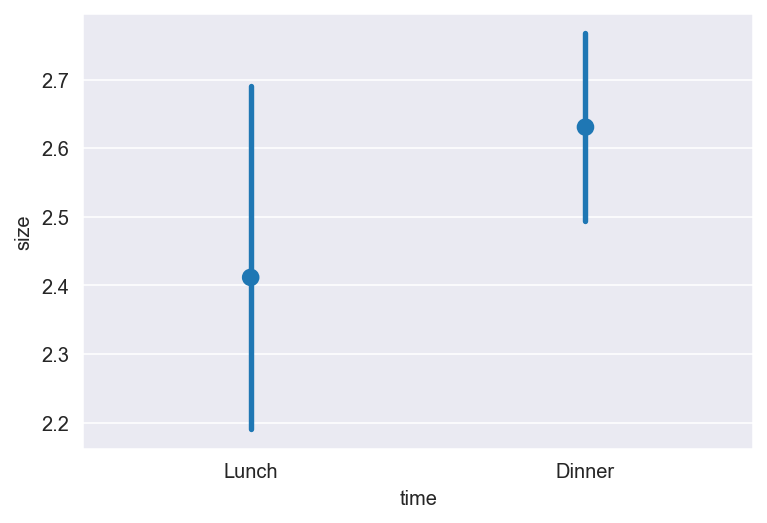

In [37]:
#点为这组数据的平均值点，竖线则为误差棒，默认两个均值点会相连接，若不想显示，可以通过join参数实现
sns.pointplot(x="time",y="size",data=tips,join=False)

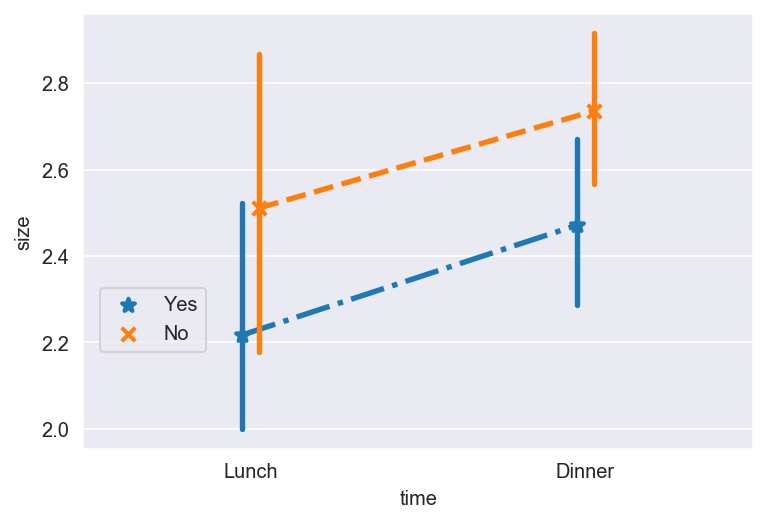

In [38]:
# 同样的，hue分组，dodge分离
# markers控制均值点的样式，linestyles控制相同色调的点之间的连线
sns.pointplot(x="time",y="size",data=tips,hue='smoker',dodge=True,
              markers=["*","x"],linestyles=["-.","--"]) # 注意哪些用split，哪些用dodge
plt.legend(loc='lower left',bbox_to_anchor=(0.01,0.2)) #设置图例位置,一般用loc='best'，第二参数可省略

##### 4.2.5 barplot 条形图

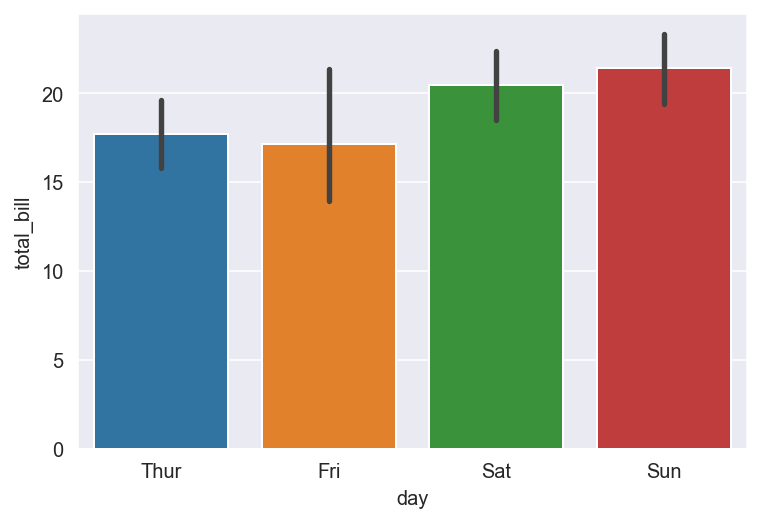

In [39]:
ax = sns.barplot(x="day", y="total_bill", data=tips,ci=95)
# 不显示条形图上面的置信度线，可以令置信区间参数ci=0

<font color=red>直方图的统计函数，默认绘制的是变量的均值 estimator=np.mean</font>

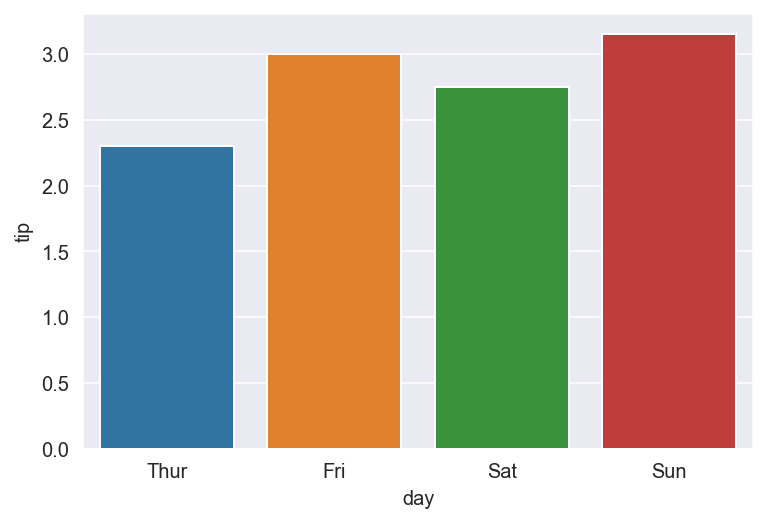

In [40]:
# 要绘制变量中位数的条形图，由estimator指定统计函数
ax = sns.barplot(x="day", y="tip", data=tips, 
                    estimator=np.median, ci=0)

# 其他分组颜色等和前文图类似

##### 4.2.6 countplot 计数图

* countplot 故名思意，是“计数图”的意思，**可将它认为一种应用到分类变量的直方图**，也可认为它是用以比较类别间计数差，调用 count 函数的 barplot；

* countplot 参数和 barplot 基本差不多，可以对比着记忆，有一点不同的是 countplot 中不能同时输入 x 和 y ，且 countplot 没有误差棒。

In [41]:
titanic = sns.load_dataset("titanic")
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


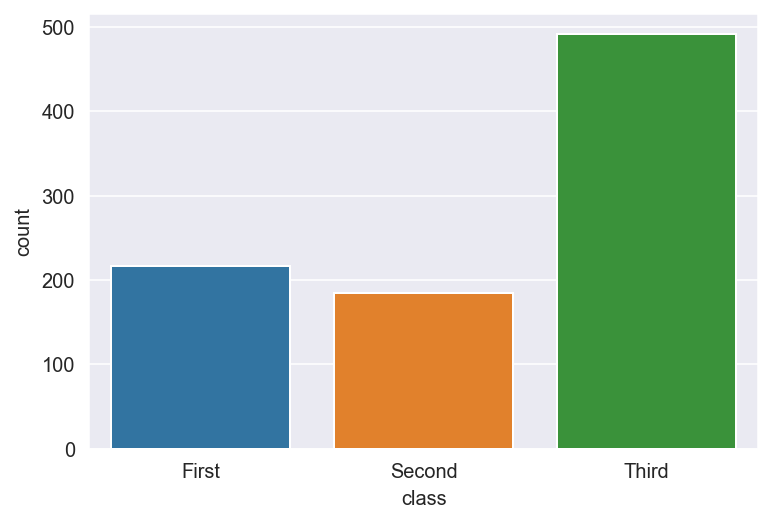

In [42]:
ax = sns.countplot(x="class", data=titanic)

##### 4.2.7 catplot（按类型绘图）

`原“factorplot”函数已重命名为“catplot”。原始名称将在未来的版本中删除。`

>catplot(x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x000001E91C36A840>, ci=95, n_boot=1000, units=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)

`参数kind:point默认，bar柱形图，count频次，box箱体，violin提琴，strip散点，swarm分散点`

In [43]:
# help(sns.catplot)

In [44]:
titanic.head(10)
# titanic.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


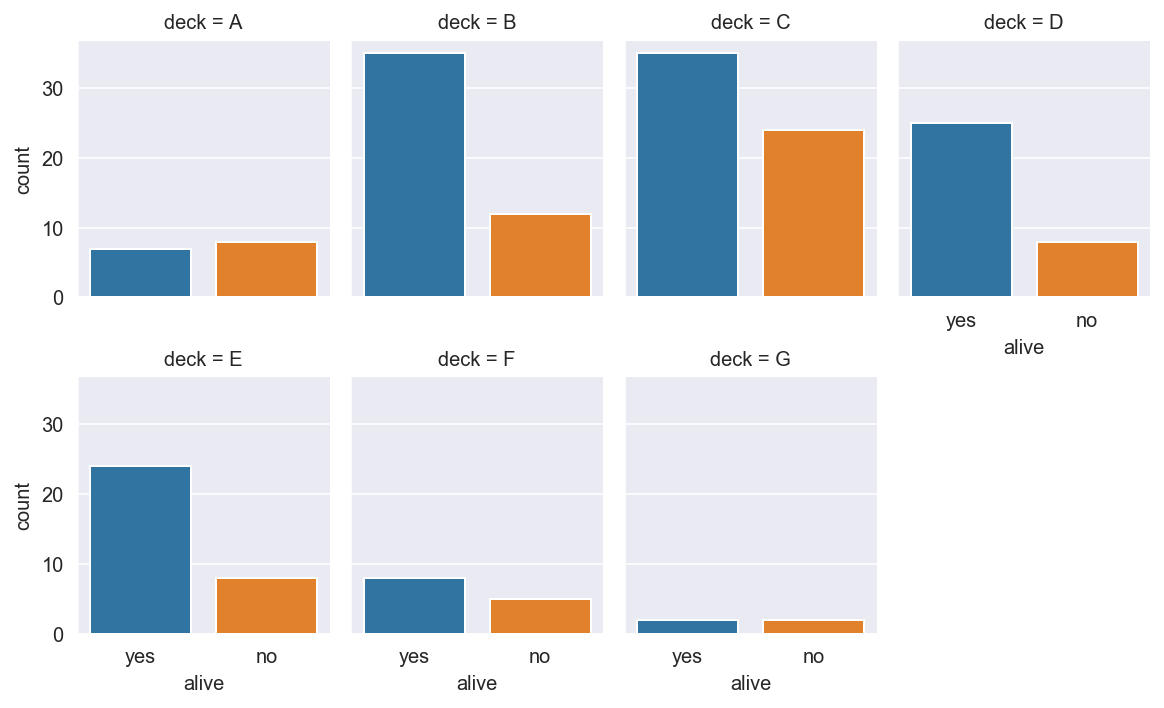

In [45]:
# 不同的deck（因子）绘制不同的alive（数值），col为分子图绘制，col_wrap每行画4个子图
g = sns.catplot(x="alive", col="deck", col_wrap=4,
                    data=titanic[titanic.deck.notnull()],
                    kind="count", height=2.5, aspect=.8)

In [46]:
# help(titanic.deck.notnull)
type(titanic.age.notnull)

method

#### 4.3 回归图 （regplot 、lmplot两种）

**regplot**：Plot data and a linear regression model fit（与线性回归模型拟合）。

**lmplot**： Plot data and regression model fits across a FacetGrid（回归模型适用于整个FacetGrid）

* regplot适用线性回归拟合，lmplot用于robust回归、logistic、lowess（非参数回归）等；
* 很多时候，我们更关心两个变量变化是如何影响第三个变量的。这也是lmplot()与regplot()的区别之一。regplot()只能显示一对变量之间的关系，而**lmplot()结合了regplot()与FacetGrid，提供了一个简单的接口，允许你探索最多其他三个分类变量的影响**。

##### 4.3.1 简单绘图

In [47]:
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


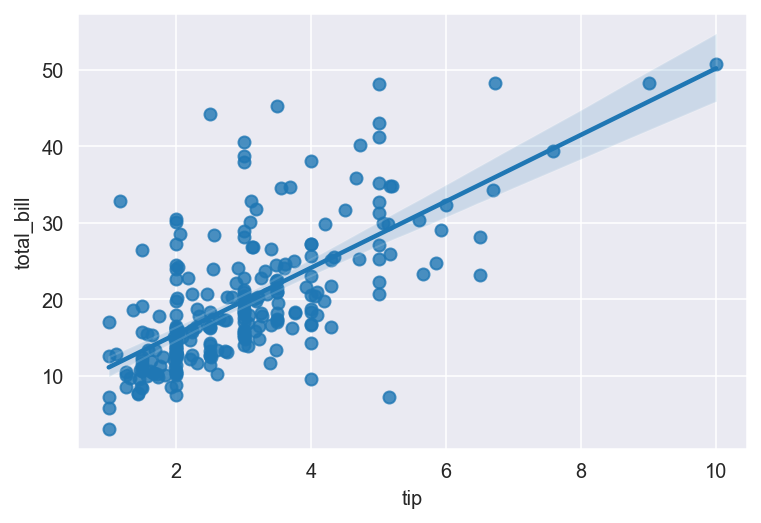

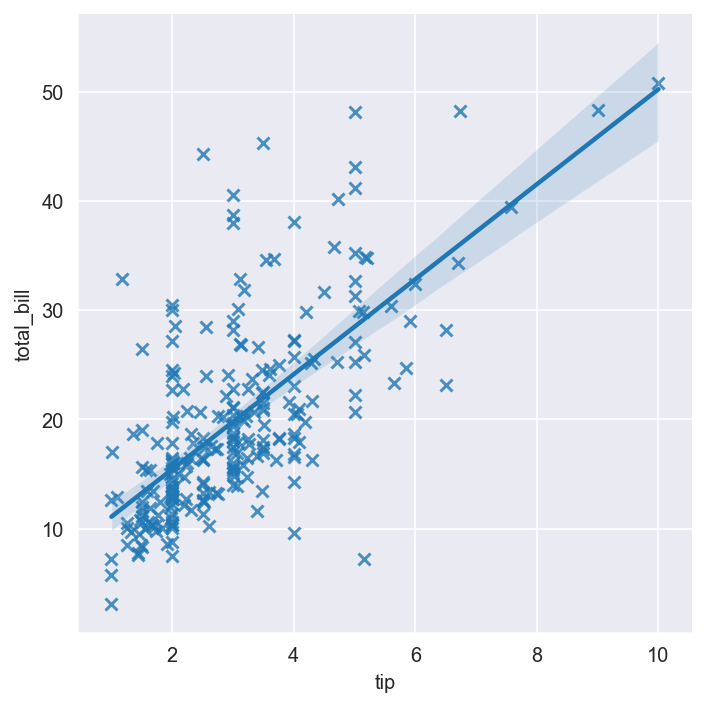

In [48]:
# 简单绘制regplot
sns.regplot(x="tip", y="total_bill", data=tips)
# 简单使用lmplot()
sns.lmplot(y="total_bill", x="tip", data=tips,markers='x')

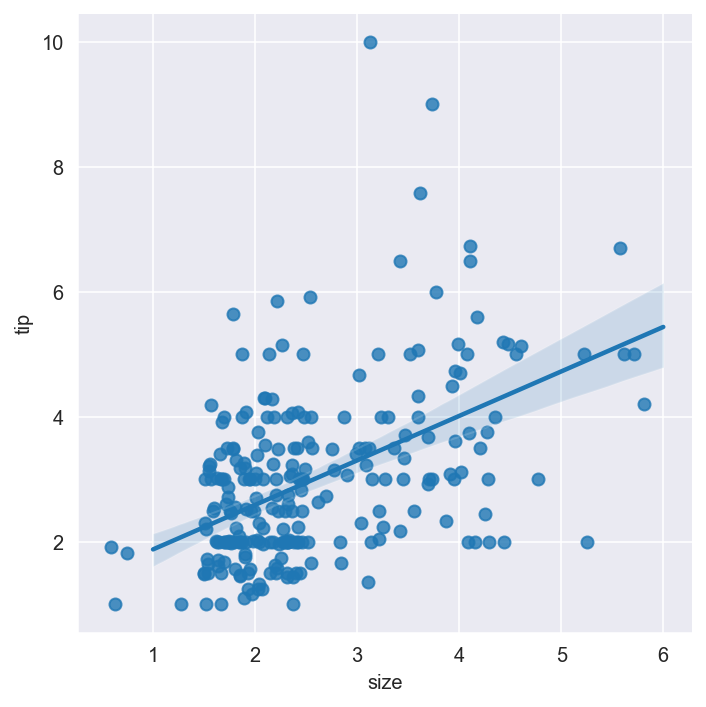

In [49]:
# x_jitter 表示沿轴随机分布，相对避免重叠
sns.lmplot(x="size", y="tip", data=tips, x_jitter=0.5)

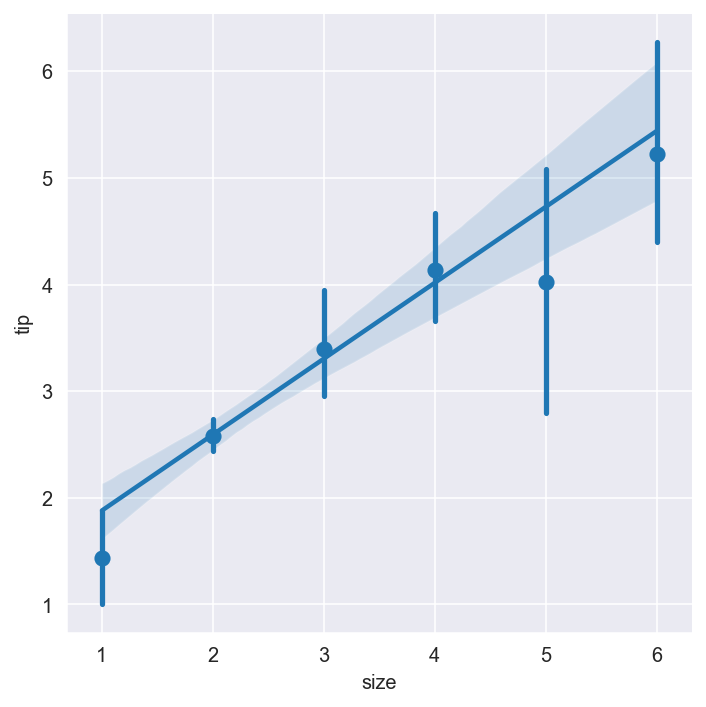

In [50]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean)

##### 4.3.3 多变量关系

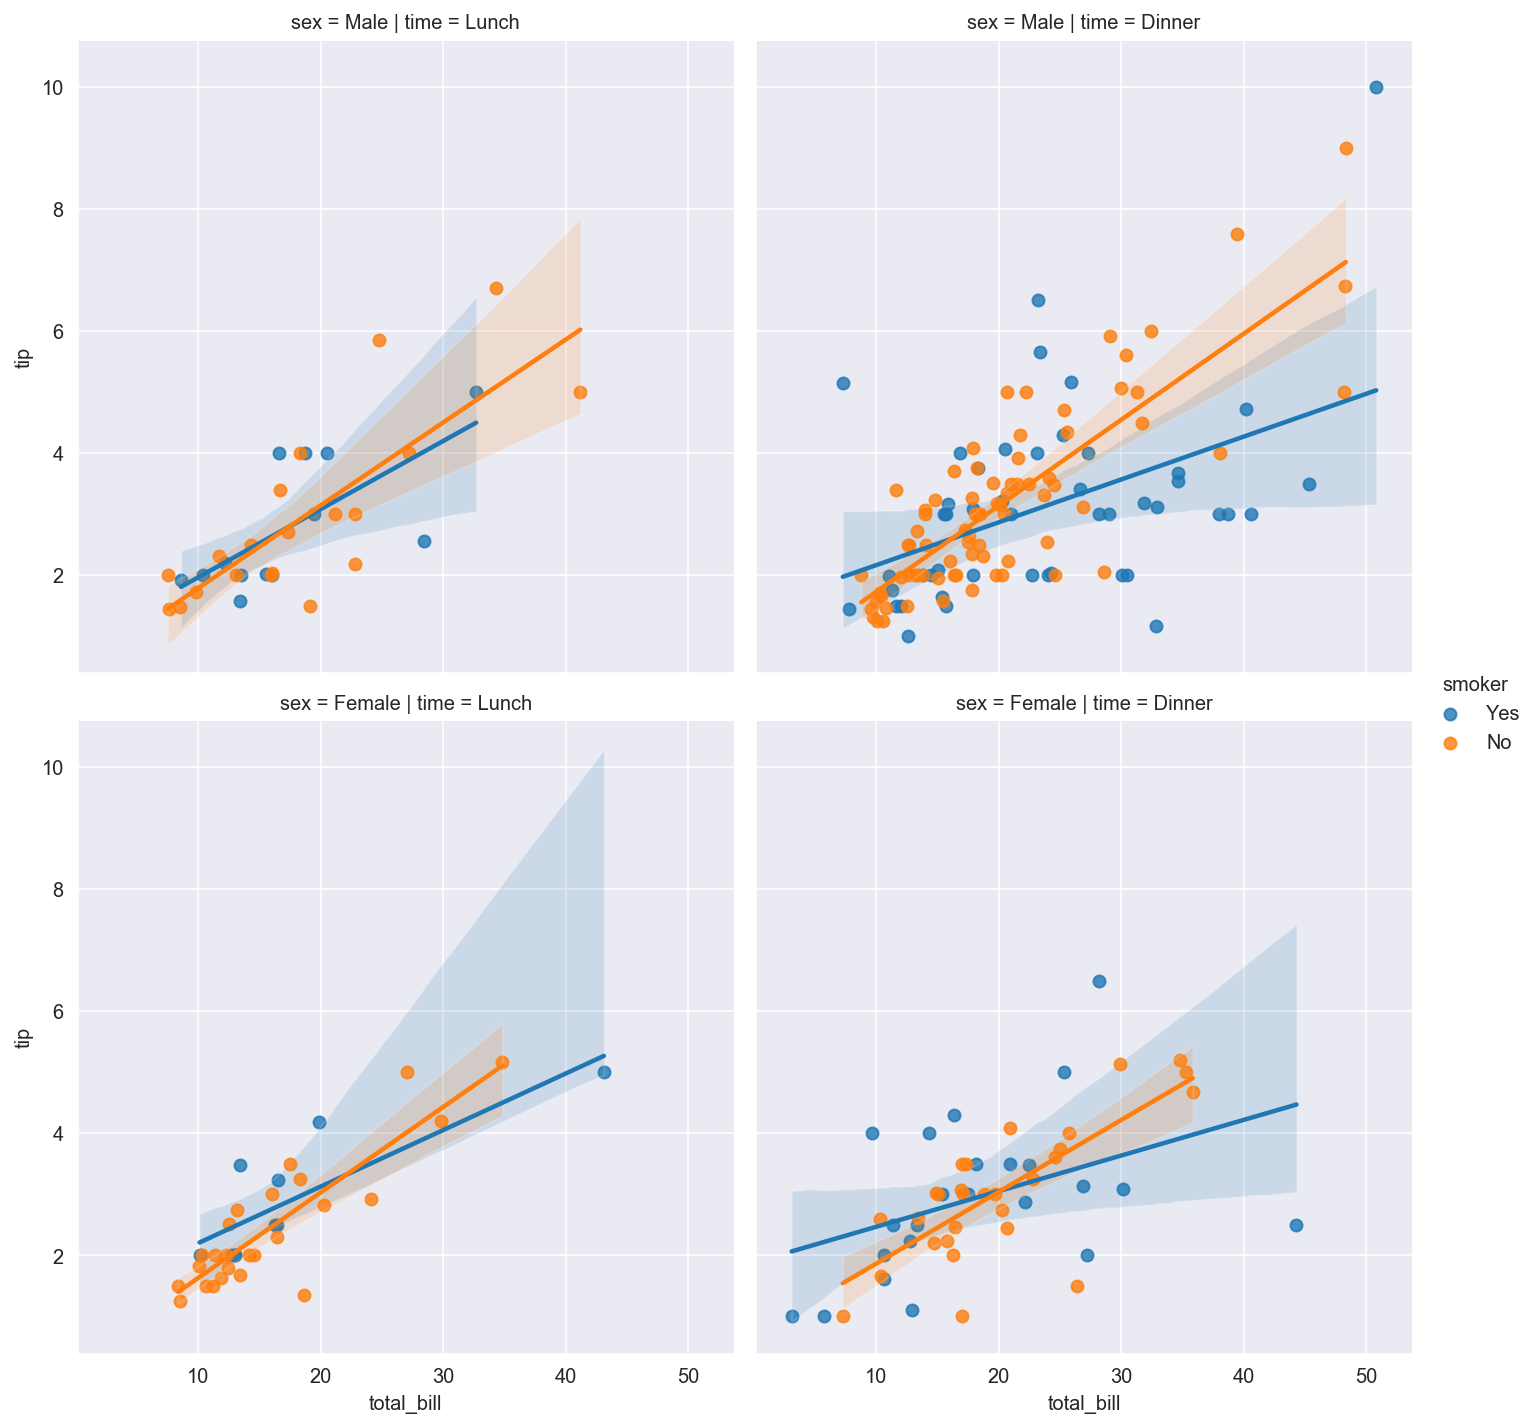

In [51]:
# 增加分类
# sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

# 横向增加时间变量
# sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips)

# 纵向增加性别变量
sns.lmplot(x="total_bill", y="tip", hue="smoker",col="time", row="sex", data=tips,height=5)

# sns.lmplot(x="total_bill", y="tip", hue="smoker",row="time", col="sex", data=tips)
# 分两行显示 col_wrap=2
# sns.lmplot(x="total_bill", y="tip", col="day",col_wrap=2,data=tips)

#### 4.5 数值分布绘图

##### 4.5.1.直方图distplot

默认：直方图hist=True，核密度曲线rug=True

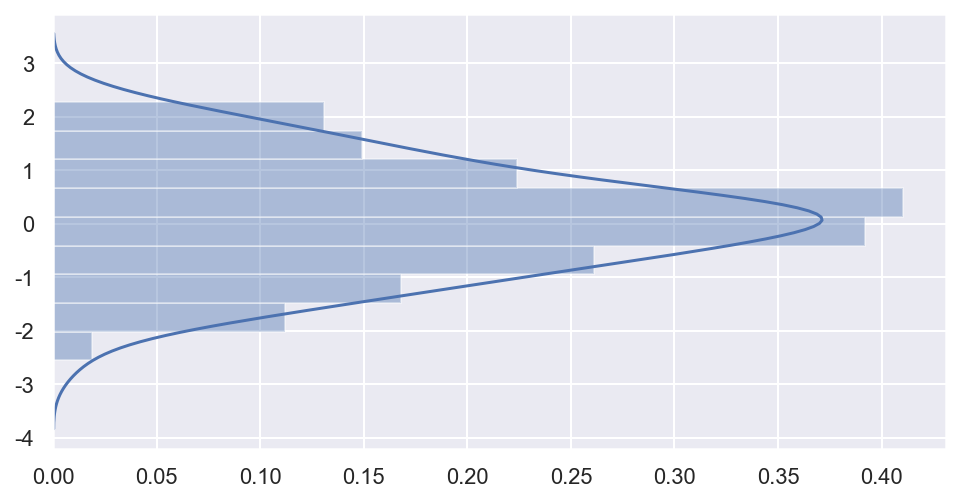

In [52]:
sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)
x = np.random.randn(100)

# 绘制数值变量的密度分布图
# 默认既绘制核密度曲线，也绘制直方图
# ax = sns.distplot(x)

# 只绘制核密度曲线，不绘制直返图
# ax = sns.distplot(x, rug=True, hist=False)

# 横着放
ax = sns.distplot(x, vertical=True)

##### 4.5.2.核密度图kdeplot

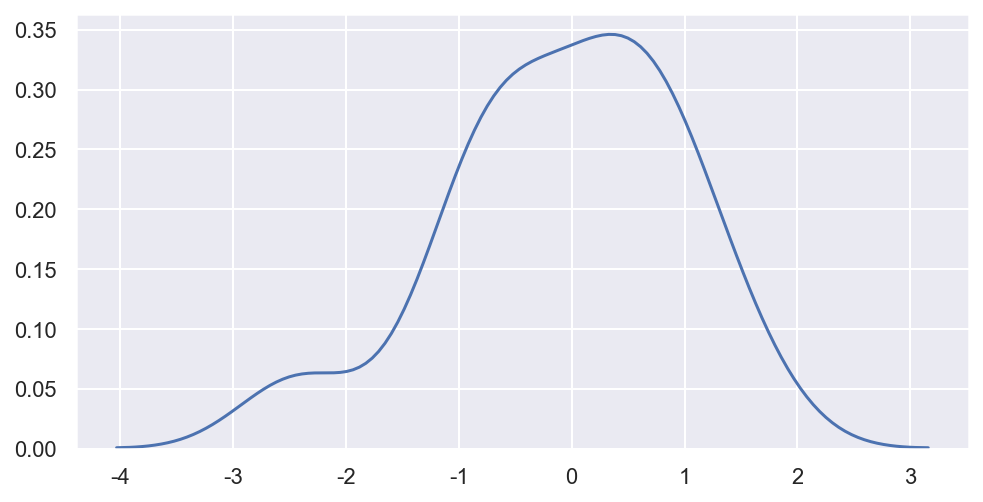

In [53]:
# import numpy as np; np.random.seed(10)
# import seaborn as sns; sns.set(color_codes=True)
mean, cov = [0, 2], [(1, .5), (.5, 1)]
x, y = np.random.multivariate_normal(mean, cov, size=50).T #随机数生成

# 绘制核密度图
ax = sns.kdeplot(x)

# shade参数决定是否填充曲线下面积
# ax = sns.kdeplot(x, shade=True, color="r")

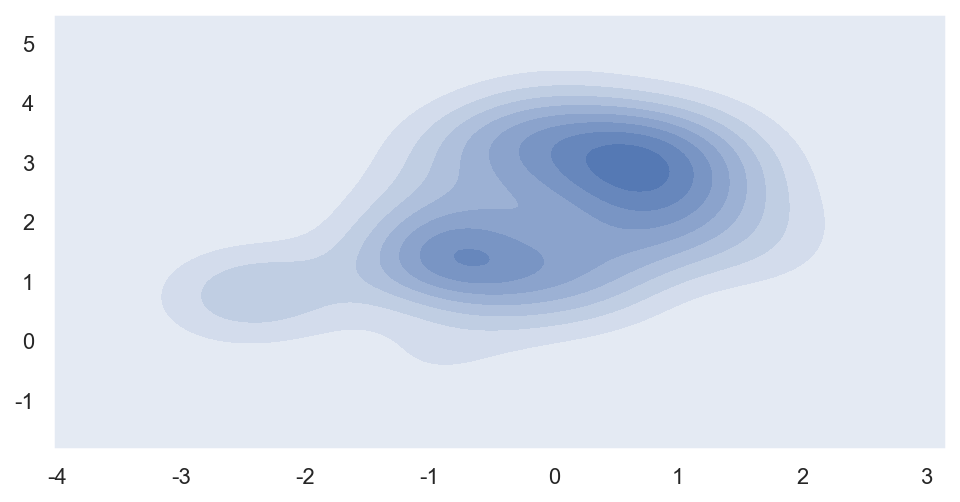

In [54]:
# 双变量密度图，相当于等高线图了
# shade 参数改用颜色深浅表示密度的大小，不过不用就真的是等高线了
ax = sns.kdeplot(x, y, shade=True)

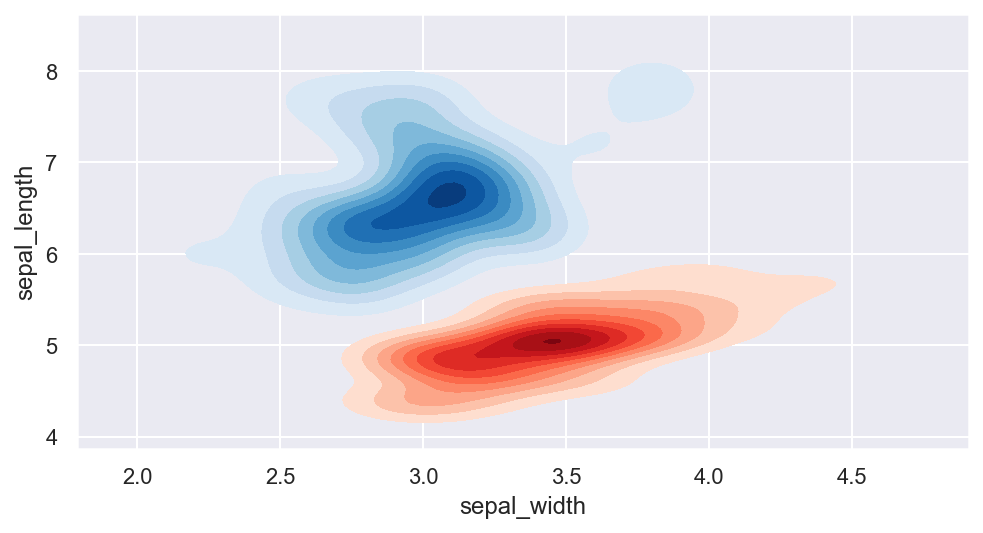

In [55]:
# 分组绘制双变量的核密度图
# 相当于绘制两个核密度图，通过图可以看到密度中心
# 类似于挖掘算法中聚类中心绘图
iris = sns.load_dataset("iris")
setosa = iris.loc[iris.species == "setosa"]  # 组1
virginica = iris.loc[iris.species == "virginica"]  # 组2

ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length, 
                    cmap="Reds", shade=True, shade_lowest=False)

ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length, 
                    cmap="Blues", shade=True, shade_lowest=False)

##### 4.5.3 热力图 heatmap

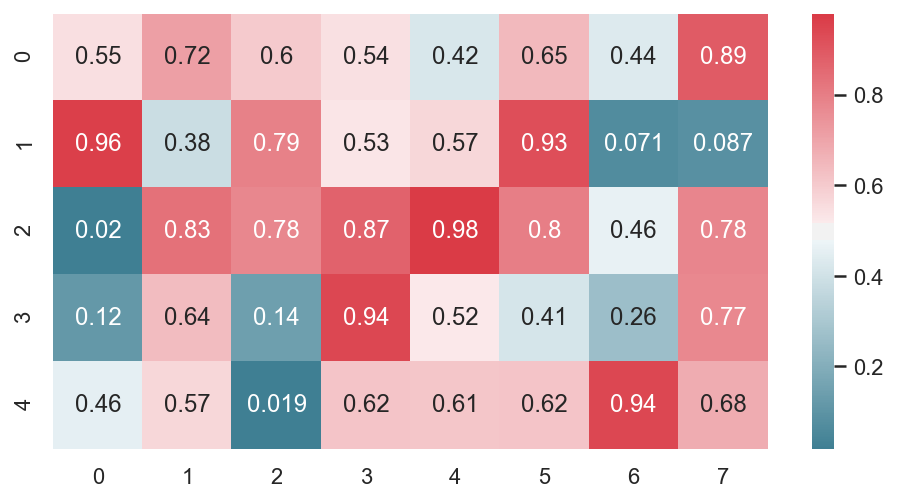

In [56]:
np.random.seed(0)
cmap = sns.diverging_palette(220, 10, as_cmap=True) # 设置配色
uniform_data = np.random.rand(5, 8)

ax = sns.heatmap(uniform_data,cmap=cmap,annot=True)  # annot：十分显示数值

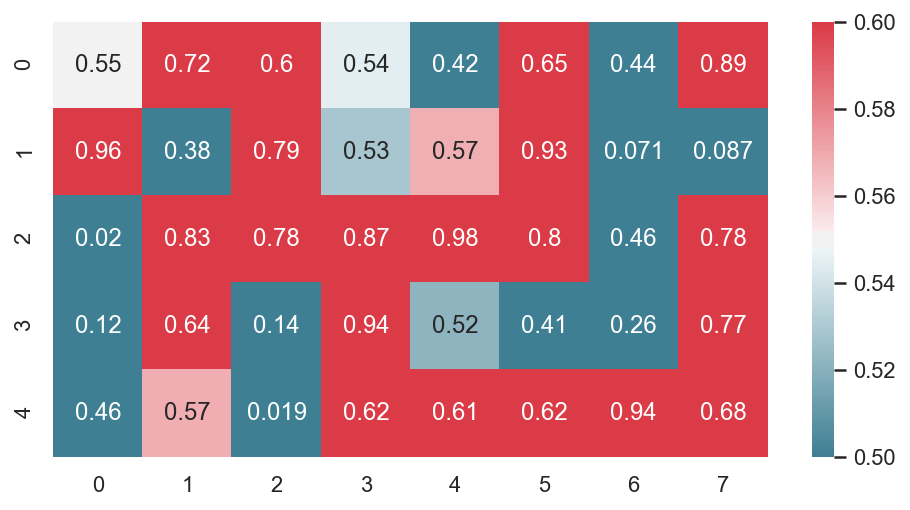

In [57]:
# 改变颜色映射的值范围 vmin=0.2, vmax=0.6
ax = sns.heatmap(uniform_data,cmap=cmap,annot=True,vmin=0.5, vmax=0.6)

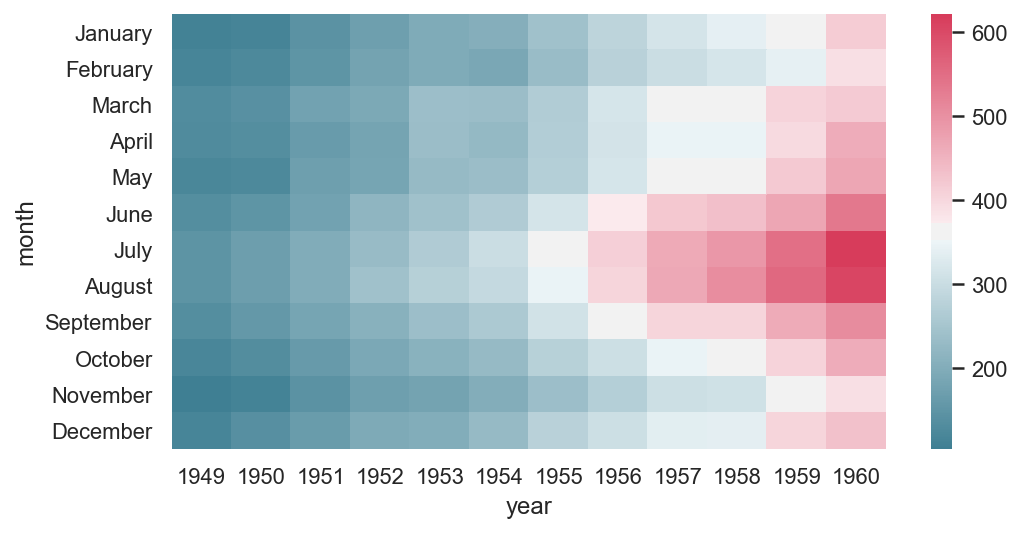

In [58]:
# Plot a dataframe with meaningful row and column labels:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers") # pivot 将 对应字段转化为 x-y-z结构（行-列-值）

# 绘制x-y-z的热力图，比如 年-月-销量 的热力图
cmap = sns.diverging_palette(220, 5, as_cmap=True) # 设置配色
ax = sns.heatmap(flights,cmap=cmap,annot=False,fmt="d") # fmt="d":添加注释时使用的字符串格式化代码

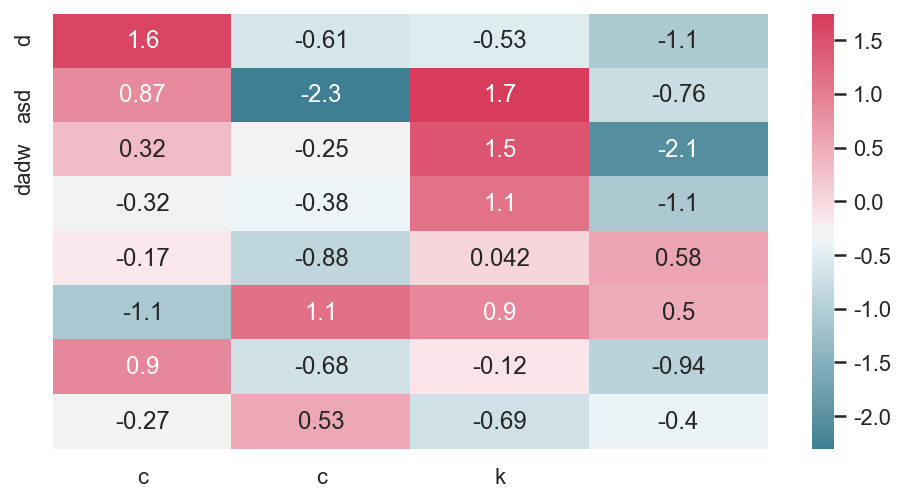

In [59]:
# xticklabels,yticklabels用来指定标签名称
np.random.seed(1)
data = pd.DataFrame(np.random.randn(8, 4))
data.columns=['a','b','c','d']
ax = sns.heatmap(data, xticklabels=['c','c','k'], yticklabels=['d','asd','dadw'],cmap=cmap,annot=True)

热力图可用户缺失值可视化，但数据量大时想要更直观，推荐一个**[缺失值可视化包missingno](http://www.sohu.com/a/311595528_99953482)**，这个包功能很简单，只有几个方法，使用起来也特别方便，不过它只能和pandas联合起来使用(这里有兴趣的可以取尝试一下)。

#### 4.6 jointplot（双变量关系组图）

joint，顾名思义，就是联合呀。 

Draw a plot of two variables with bivariate and univariate graphs.
(用双变量图和单变量图绘制一个由两个变量组成的图。)

* 重要参数：

kind参数可以使用不同的图形反应两变量的关系，比如点图，线图，核密度图。kind : { "scatter" | "reg" | "resid"(残差) | "kde" （等高线/核密度）| "hex" （六边形密度图）}, optional Kind of plot to draw.

space=0 "附图"间隔；height=5 正方形图边长, ratio=2 轴高比

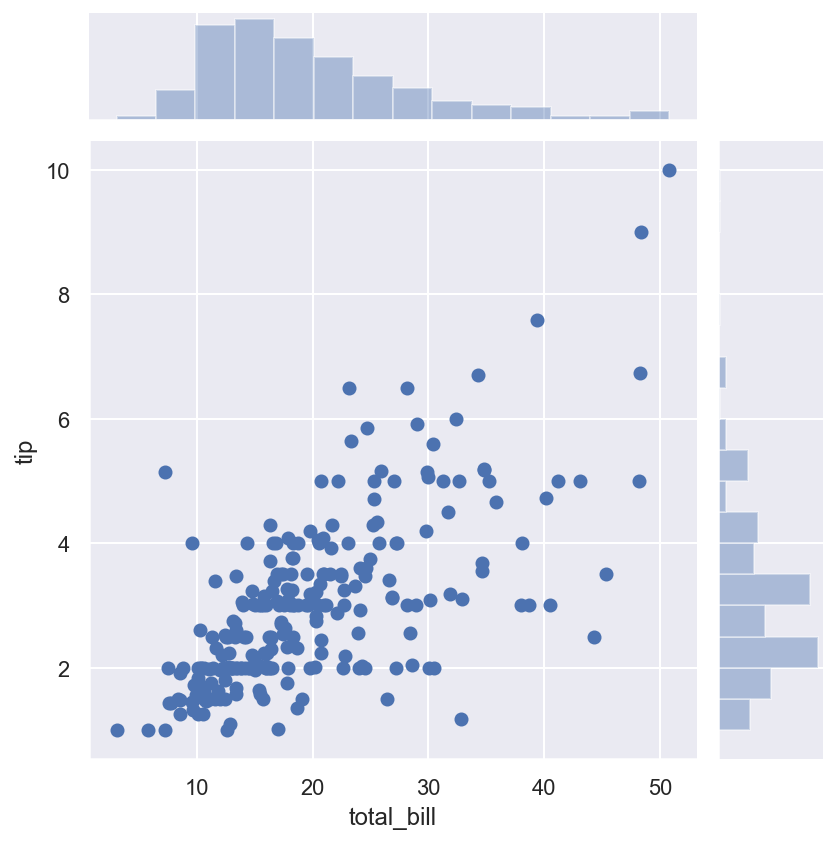

In [60]:
# 默认绘制双变量的散点图，计算两个变量的直方图，计算两个变量的相关系数和置信度
# import numpy as np, pandas as pd; np.random.seed(0)
# import seaborn as sns; sns.set(style="white", color_codes=True)
tips = sns.load_dataset("tips")
g = sns.jointplot(x="total_bill", y="tip", data=tips)

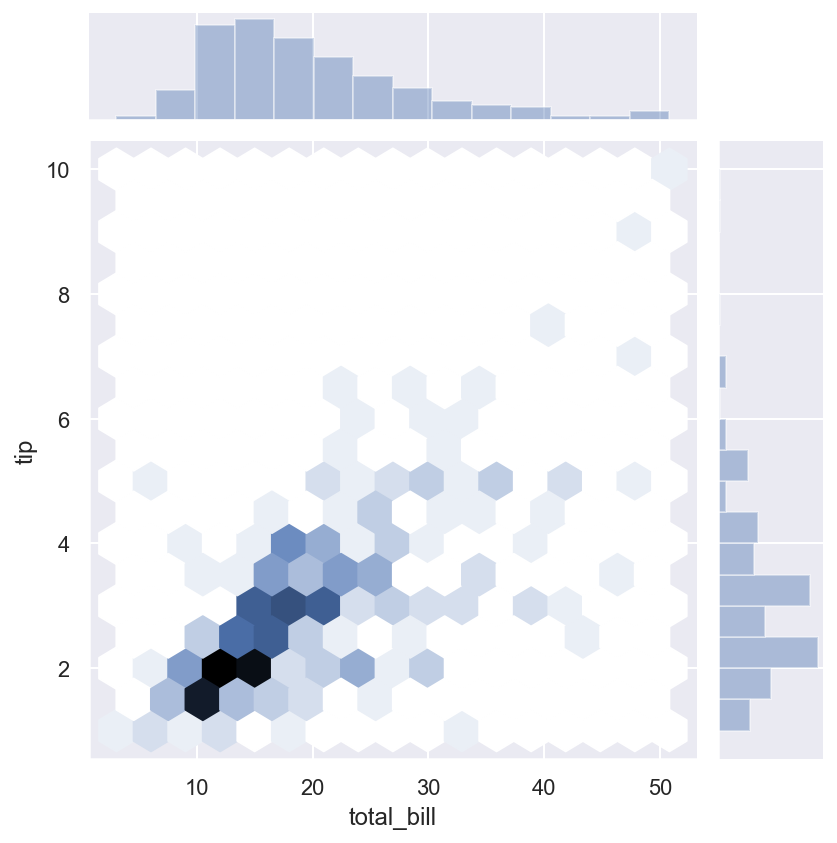

In [61]:
# 使用六角形代替点图图
g = sns.jointplot("total_bill", "tip", data=tips, kind="hex")

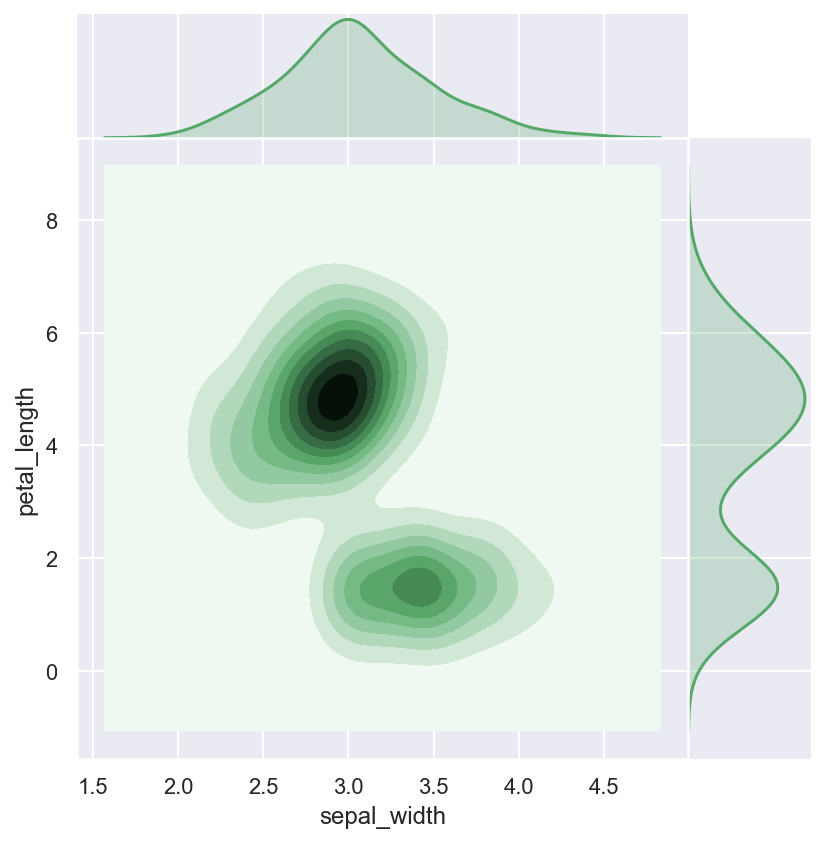

In [62]:
# 绘制核密度图
iris = sns.load_dataset("iris")
g = sns.jointplot("sepal_width", "petal_length", data=iris, 
                    kind="kde", space=0, color="g")

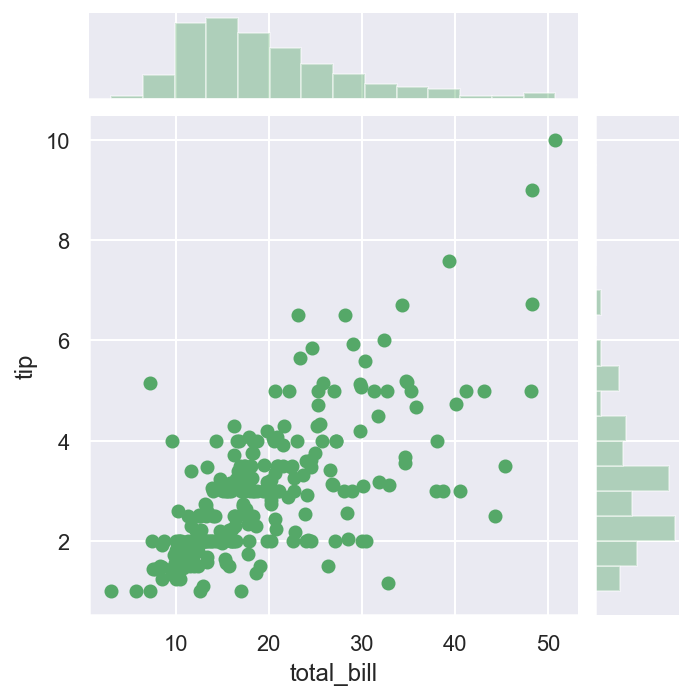

In [63]:
# 控制图形的大小和颜色
g = sns.jointplot("total_bill", "tip", data=tips, 
                   height=5, ratio=5, color="g")

#### 4.7 pairplot（成对关系组图）

Plot pairwise relationships in a dataset.（在数据集中绘制成对关系。）

In [64]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


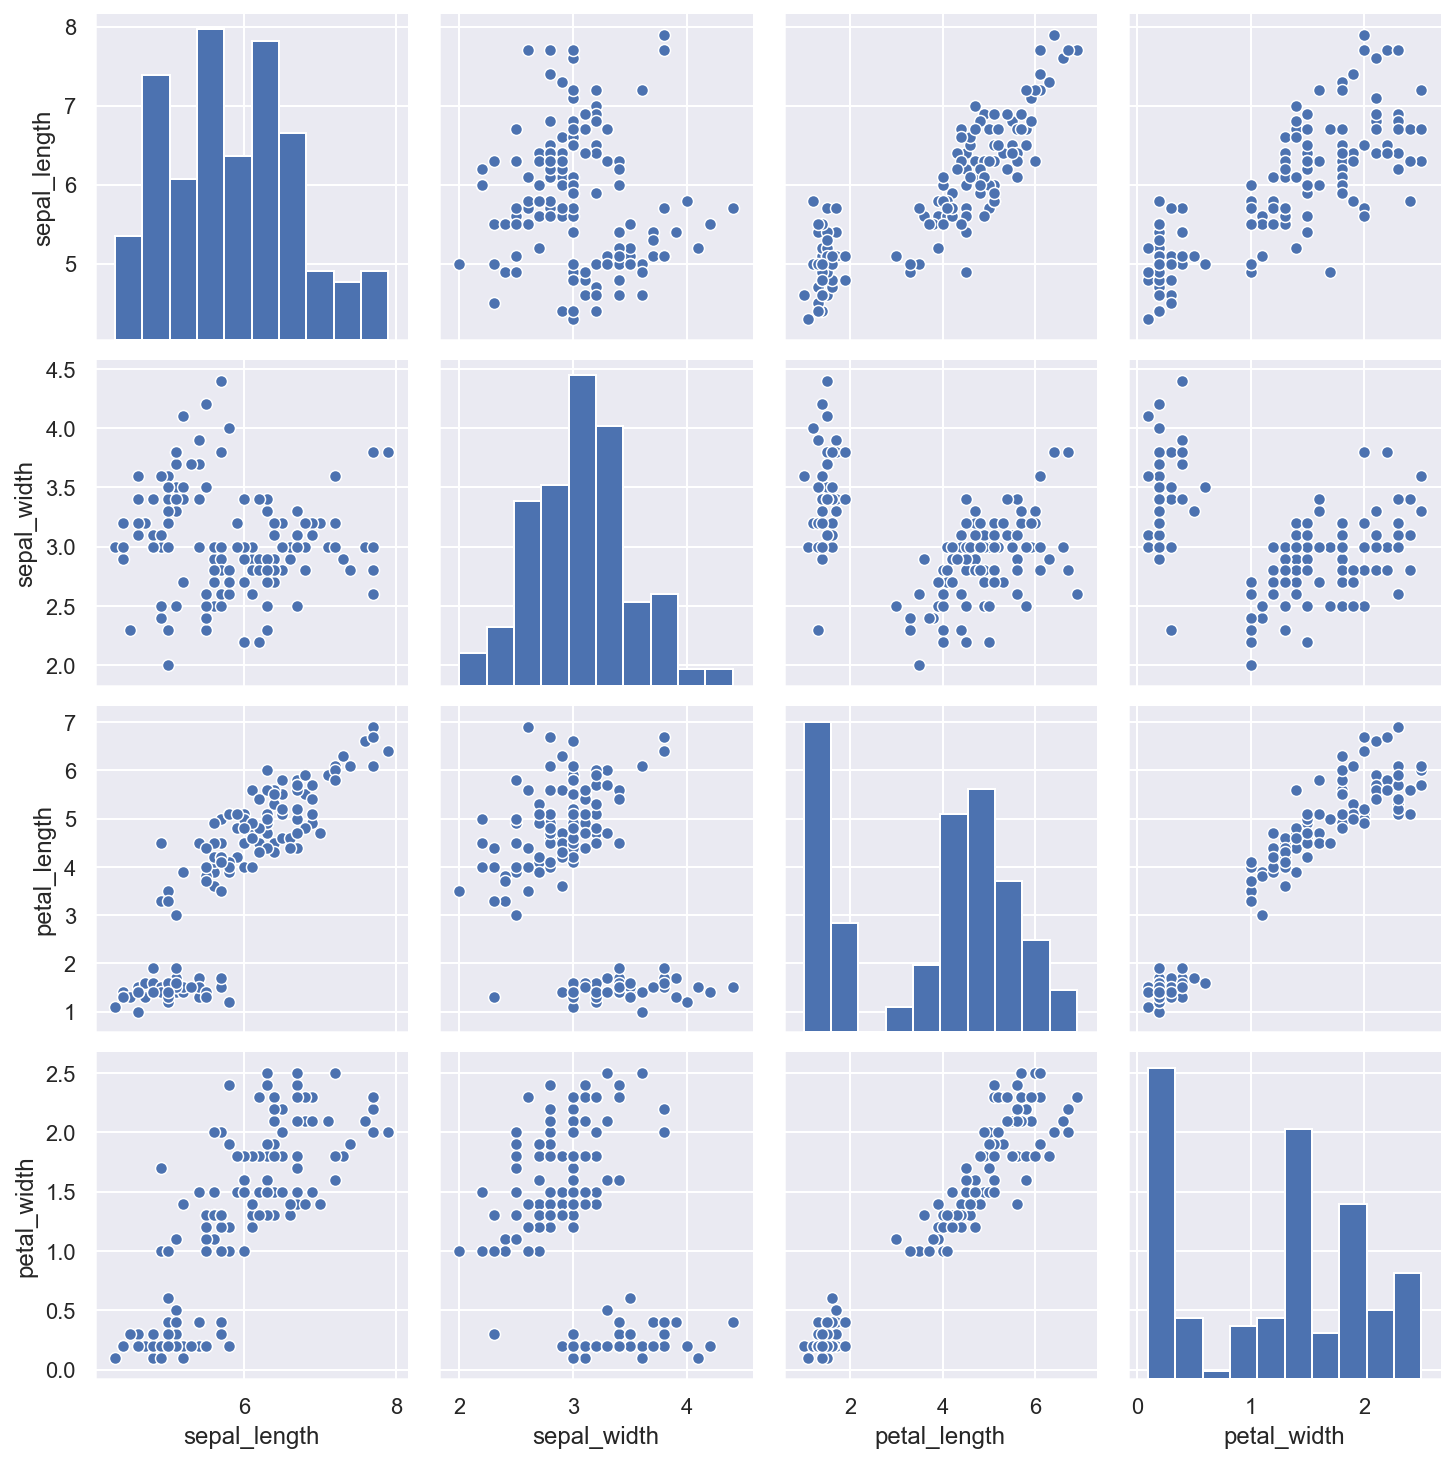

In [65]:
# import seaborn as sns; sns.set(style="ticks", color_codes=True)
# iris = sns.load_dataset("iris")
g = sns.pairplot(iris)

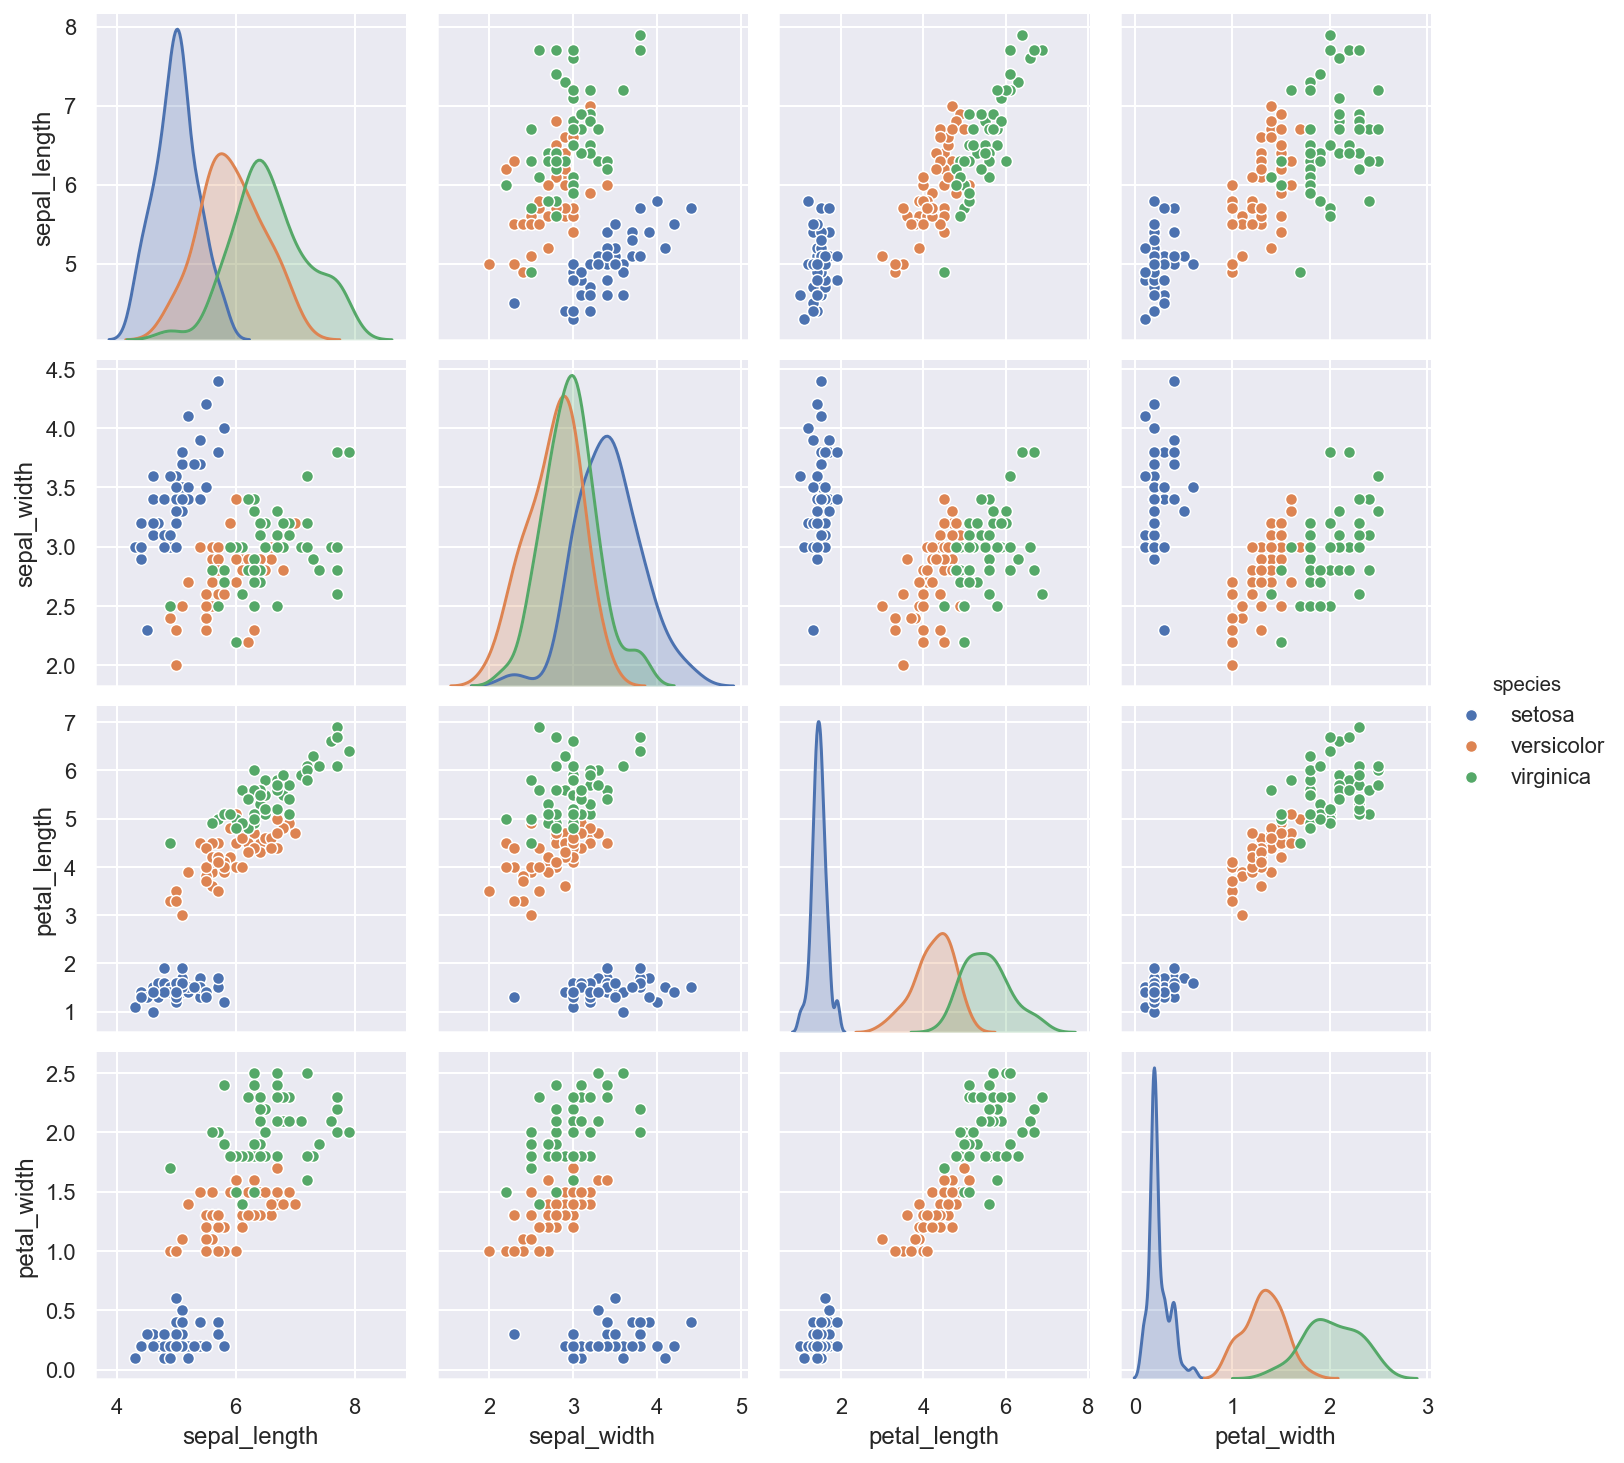

In [66]:
# 分组的变量关系图，看上去很厉害吧
g = sns.pairplot(iris, hue="species")

# hue 分组后，不同的组用不同的形状标记
# g = sns.pairplot(iris, hue="species", markers=["o", "s", "D"])

# 当然也可以只取dataframe中的一部分变量绘图
# g = sns.pairplot(iris, vars=["sepal_width", "sepal_length"])

# 对角线默认绘制直方图，当然也可以绘制核密度图
# g = sns.pairplot(iris, diag_kind="kde")

# 相应的，两变量关系图，也可以绘制线性回归图
# g = sns.pairplot(iris,kind='reg')

#### 4.8 clustermap（聚类图）

Plot a matrix dataset as a hierarchically-clustered heatmap.(将矩阵数据集绘制为分层聚类的热图。)

参数：
 继承sns.heatmap；data不为空的2D array-like；默认：method='average', metric='euclidean', z_score=None，…

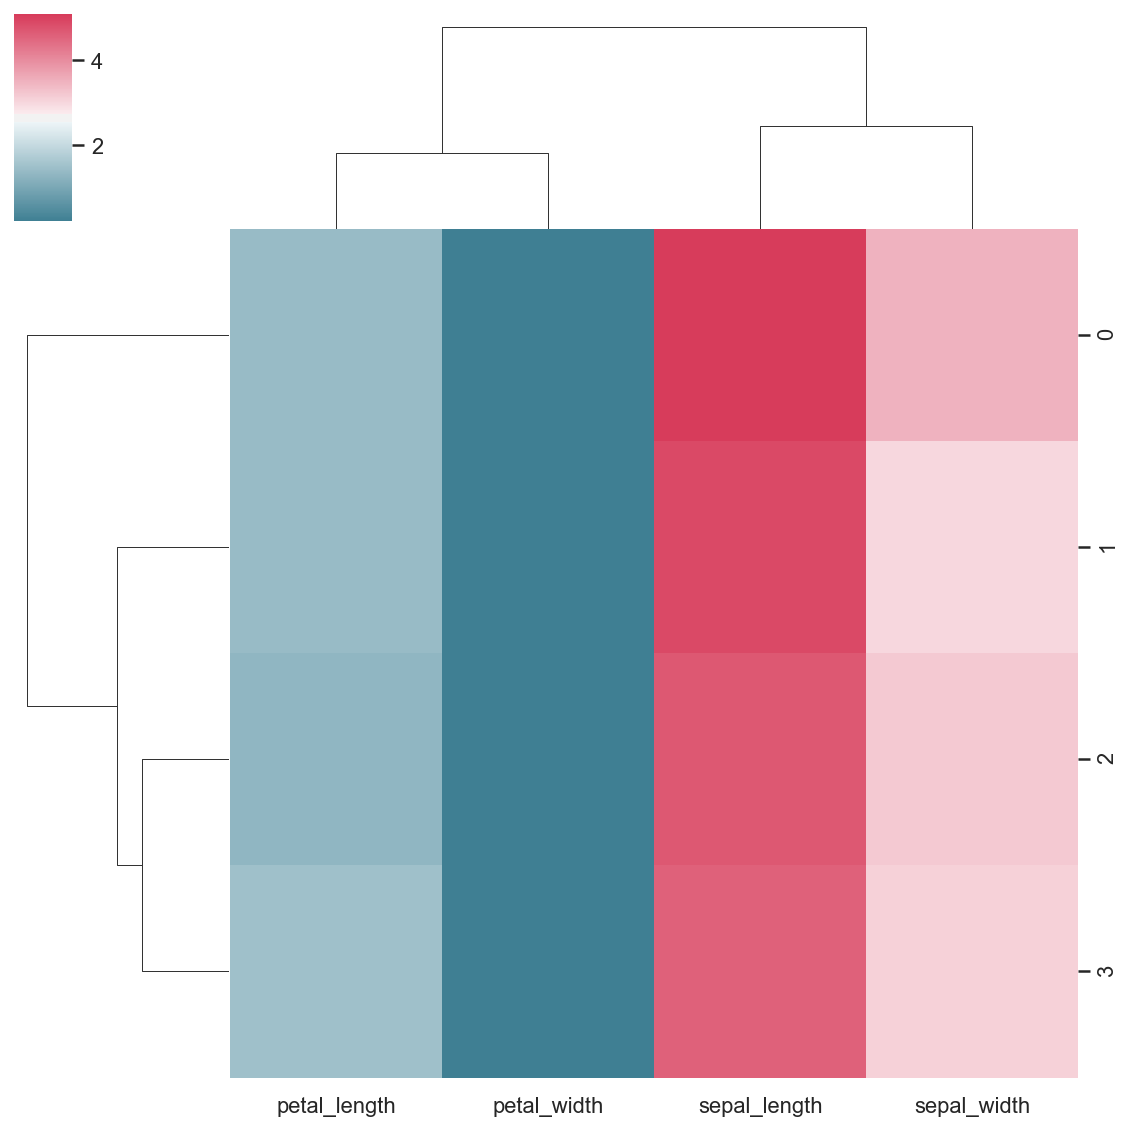

In [67]:
# type(iris.iloc[:,0:4])
ax=sns.clustermap(iris.iloc[0:4,0:4],cmap=cmap,figsize=(8,8))

In [68]:
# help(sns.clustermap)

#### 4.9 lineplot（时间序列图）

连续时间可以用matplotlib.pyplot.plot()，但可视效果欠佳，将时间转为数字再注释也麻烦；

时间序列绘图常用lineplot（替换原tsplot）。

>lineplot(x=None, y=None, hue=None, size=None, style=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, dashes=True, markers=None, style_order=None, units=None, estimator='mean', ci=95, n_boot=1000, sort=True, err_style='band', err_kws=None, legend='brief', ax=None, **kwargs)

In [69]:
iris.head(4)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


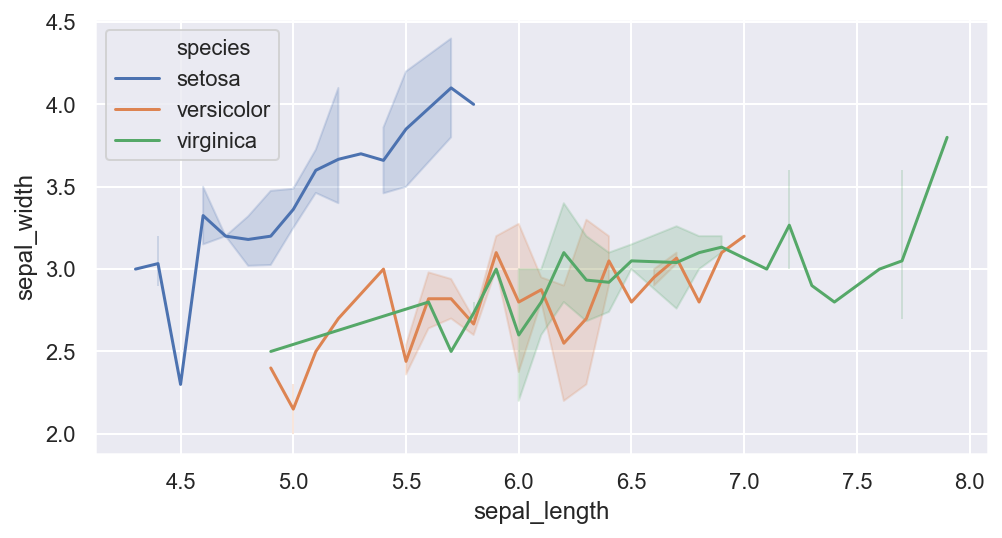

In [70]:
ax=sns.lineplot(x='sepal_length',y='sepal_width',data=iris,hue='species')

这里重点讲一下。如果时序中每天的数据都有还好说，如果没有，就需要采样了。

#### 4.10 双坐标轴

Text(0.5, 1.0, 'double series figure')

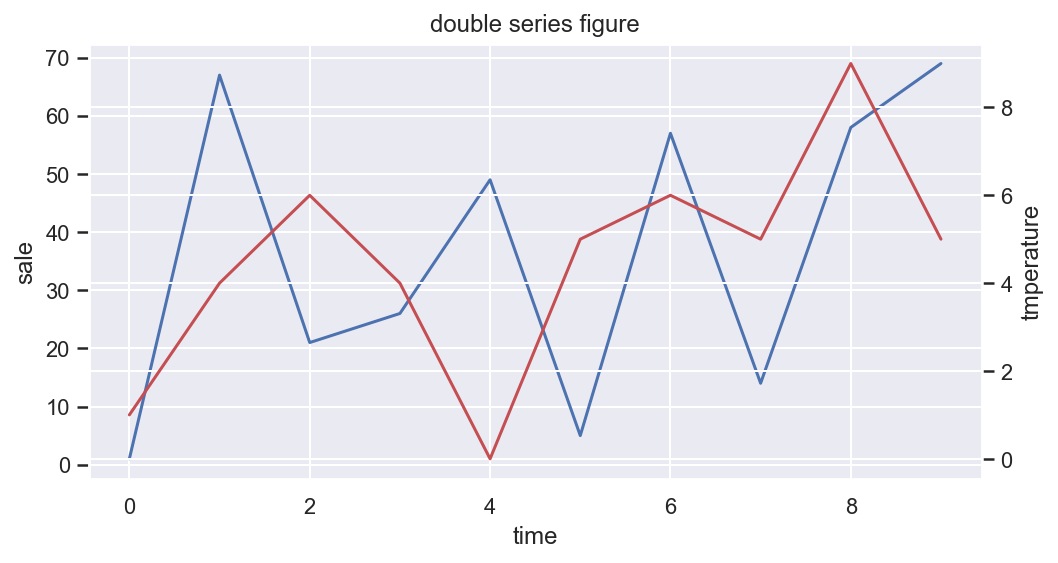

In [71]:
# import seaborn as sns
sale=pd.Series(np.random.random(10)*100).map(int)
tmperature=pd.Series(np.random.random(10)*10).map(int)

ax=plt.subplot(111)
sale.plot(ax=ax,color='b')
ax.set_xlabel('time')
ax.set_ylabel('sale')

# 重点来了，twinx 或者 twiny 函数
ax2 = ax.twinx()
tmperature.plot(ax=ax2,color='r')
ax2.set_ylabel('tmperature')
plt.title('double series figure')

恭喜你，现在你已经具备了很强的数据探索能力以及学习人工智能的编程能力啦，赶紧提交反馈，开始下一阶段吧。

（如果你工作中会接触到各类数据，那么可以试试提出一个具体的问题，并进行简单统计、探索，输出一份分析报告吧）